# ReCell

## Problem Statement


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.



## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Data reading and manipulating
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set defaut asethetics for plots
sns.set()
# Display plots
%matplotlib inline

# Data splitting into train and test
from sklearn.model_selection import train_test_split

# Linear regression_model
from sklearn.linear_model import LinearRegression

# Linear regression_model using statsmodels
import statsmodels.api as sm

# Check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# error handling
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# mount google drive to load data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read CSV file from Google Drive
path = ('/content/drive/MyDrive/Colab Notebooks/Data/used_device_data.csv')
data = pd.read_csv(path)

## Data Overview

* Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not.
* Get information about the number of rows and columns in the dataset.
* Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
* Check the statistical summary of the dataset to get an overview of the numerical columns of the data.


In [ ]:
# View the first and last few rows of the dataset, without any overlap
# View dataset shape, info
pd.concat([data.head(), data.tail()])

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [ ]:
# Checking the shape of the dataset
data.shape

(3454, 15)

In [ ]:
# Checking the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observations:
* The data loaded properly.
* There are 3454 rows and 15 columns.
* Columns are consistent with data description provide by ReCell:
   *  brand_name: Name of the device's brand (e.g., Honor, Samsung).
   * os: Operating system of the device (e.g., Android, iOS).
   * screen_size: Screen size in inches.
   * 4g: Indicates if the device supports 4G (yes/no).
   * 5g: Indicates if the device supports 5G (yes/no).
   * main_camera_mp: Resolution of the main camera in megapixels.
   * selfie_camera_mp: Resolution of the selfie camera in megapixels.
   * int_memory: Internal memory in GB.
   * ram: RAM size in GB.
   * battery: Battery capacity in mAh.
   * weight: Weight of the device in grams.
   * release_year: Year of device release.
   * days_used: Number of days the device has been used.
   * normalized_used_price: Normalized used price of the device **this will be the dependant variable**
   * normalized_new_price: Normalized new price of the device.

**Key Insights:**
  * **There appears to be some missing values in columns:
main_camera_mp (3275 non-null values).
selfie_camera_mp (3452 non-null values).
int_memory (3450 non-null values).
ram (3450 non-null values).
battery (3448 non-null values).
weight (3447 non-null values).**

* **All other columns have complete data.
Data types are appropriate for most columns (object(4), float(9), int(2)), though 4g and 5g are stored as objects and could be converted to boolean for better analysis.**


### Perform sanity checks and explore the data,

In [ ]:
# Check unique values in categorical columns

# Check if device supports 4g or 5g
unique_4g = data['4g'].unique()
unique_5g = data['5g'].unique()

# Check types of brand names
unique_brand = data['brand_name'].unique()
# Count values types of brand names
unique_brand_counts = data['brand_name'].value_counts()

# Check type of os
unique_os = data['os'].unique()
# Count values type of os
unique_os_counts = data['os'].value_counts()


print("Unique values in 4g column:", unique_4g)
print("Unique values in 5g column:", unique_5g)
print("Unique values in brand_name column:", unique_brand)
print("Unique values in brand_name column:", unique_brand_counts)
print("Unique values in os column:", unique_os)
print("Unique values in os column:", unique_os_counts)

Unique values in 4g column: ['yes' 'no']
Unique values in 5g column: ['no' 'yes']
Unique values in brand_name column: ['Honor' 'Others' 'HTC' 'Huawei' 'Infinix' 'Lava' 'Lenovo' 'LG' 'Meizu'
 'Micromax' 'Motorola' 'Nokia' 'OnePlus' 'Oppo' 'Realme' 'Samsung' 'Vivo'
 'Xiaomi' 'ZTE' 'Apple' 'Asus' 'Coolpad' 'Acer' 'Alcatel' 'BlackBerry'
 'Celkon' 'Gionee' 'Google' 'Karbonn' 'Microsoft' 'Panasonic' 'Sony'
 'Spice' 'XOLO']
Unique values in brand_name column: Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Mic

Observations & Insights:

Unique Values in Categorical Columns:

* 4g: Values are ['yes', 'no'] (consistent). 5g: Values are ['no', 'yes'] (consistent).
*  Observed distribution of phones/tablets by brand.
* Also, observed, types of operating systems the phones/tablets use.

In [ ]:
# Get statistical summary, using include='all', to ensure getting the
# summary for every column in DataFrame, regardless of its data type
# as this dataframe contains a mix of numerical and categorical variables
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


Descriptive Statistics (Key Observations):
* Screen Size: Mean = 13.71 inches, range from 5.08 to an unrealistic 30.71 inches (indicates outliers exist).

* Battery Capacity: Mean = 3,133 mAh, range is from 500 to 9,720 mAh (indicates an  acceptable bounds).

* Weight: Mean = 182.75 g, outliers greater than 50g but below 855g.

Outliers:
* Screen Size (phones/tblets) greater than 20 inches are likely outliers (e.g., 25.50 inches).

* Battery: No extreme outliers detected; values appear realistic.

* Phones/tablets weight less than 50g or more than 500g (e.g., 520 g, 630.5 g) could be outliers.

* Significant missing values in:
main_camera_mp (179 missing).
Other columns with few missing values: selfie_camera_mp (2), int_memory (4), ram (4), battery (6), weight (7).

###Checking for duplicate values


In [ ]:
data.duplicated().sum()

0

* There are no dupplicate values in the dataset.

###Checking for missing values

In [ ]:
data.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


* There are missing values in many columns.

In [ ]:
# Create a copy of the data to avoid any changes to original data
df = data.copy()

##Exploratory Data Analysis + Specified Questions (EDA):

Note:

* **Focus will be on the model building aspects for key insights.**
* **Additional EDA can be seen in the Appendix section for more insights into the dataset.**

In [ ]:
def eda_combined_plot(data, column, boxplot_color="pink", histogram_color="lime"):
    """
    Perform EDA for a given column in a DataFrame, including a boxplot and a histogram/barplot.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The column to analyze.
        boxplot_color (str): Color for the boxplot.
        histogram_color (str): Color for the histogram/barplot.
    """
    # Set up the figure
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 2]})

    # Boxplot
    sns.boxplot(data=data, x=column, ax=axes[0], color=boxplot_color, width=0.5)

    # Calculate the mean only for numeric columns
    if np.issubdtype(data[column].dtype, np.number):
        mean_value = data[column].mean()
        # Add the mean as a triangle marker to the boxplot
        axes[0].scatter(mean_value, 0, color="green", marker="^", s=100, label="Mean")
        axes[0].legend()

    # Set boxplot title
    axes[0].set_title(f"Boxplot of {column}", fontsize=12)

    # Histogram or Barplot
    if np.issubdtype(data[column].dtype, np.number):
        # Numeric column: Histogram
        sns.histplot(data[column], bins=50, kde=False, ax=axes[1], color=histogram_color)

        # Calculate the median
        median_value = data[column].median()

        # Add mean and median lines to the histogram
        axes[1].axvline(mean_value, color="green", linestyle="--", label="Mean")
        axes[1].axvline(median_value, color="black", linestyle="-", label="Median")

        # Add legend
        axes[1].legend()

        # Set histogram title
        axes[1].set_title(f"Histogram of {column}", fontsize=12)

    else:
        # Categorical column: Barplot
        sns.countplot(data=data, x=column, ax=axes[1], color=histogram_color)

        # Set barplot title
        axes[1].set_title(f"Barplot of {column}", fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
def labeled_barplot(data, column):
    """
    Create a barplot for a categorical column with labels showing the counts on top of the bars.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The categorical column to visualize.
    """
    # Create the barplot
    ax = sns.countplot(data=data, x=column, palette="pastel", width=0.8)

    # Add labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=7, color='black')

    # Set the title
    ax.set_title(f"Barplot of {column} with Counts", fontsize=14)

    # Reduce the size of x-axis labels
    plt.xticks(rotation=90, fontsize=8)

    # Adjust layout to avoid label cutoff
    plt.tight_layout()
    plt.show()


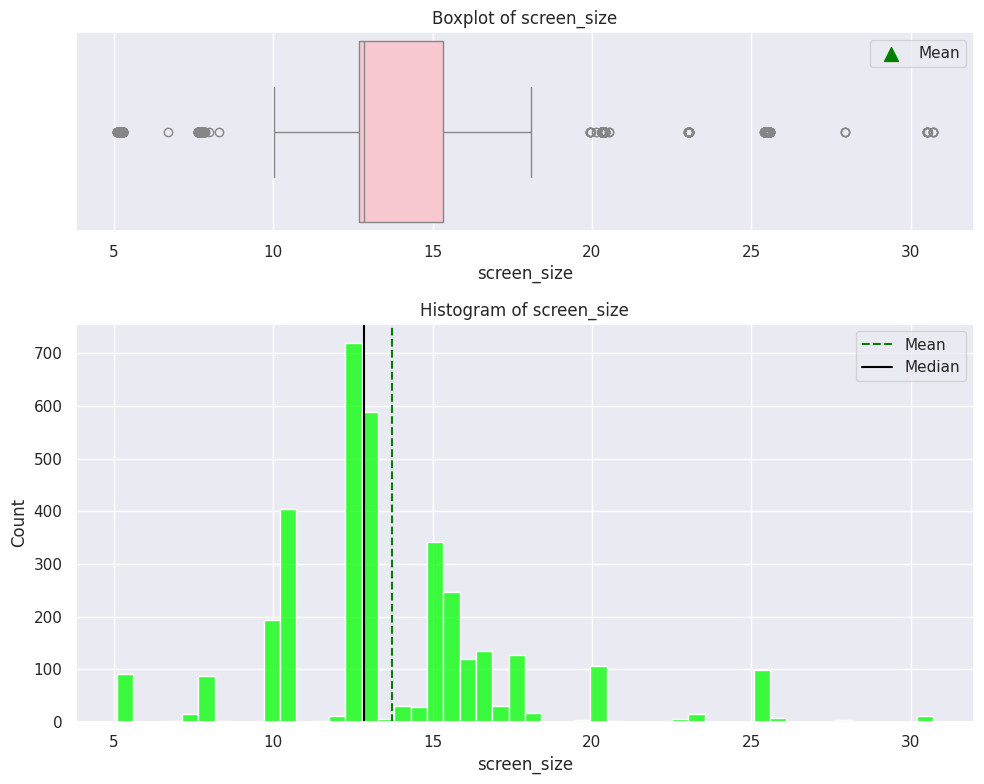

In [ ]:
# Distribution of screen size
eda_combined_plot(data, 'screen_size')


Observations/Insights:

Box Plot:
* Most phones/tablets fall within a moderate screen size range.
* A few phones/tablets have extremely small or large screen sizes, appearing as outliers.

Histogram:
* Most phones/tablets are clustered around 10-15 inches (this aligns with standard sizes for phones/tablets), with a sharp peak near 10-12 inches.
* Larger screen sizes (>20 inches) are less frequent.
* The data shows a few very small phones/tablets, likely representing compact or older models.

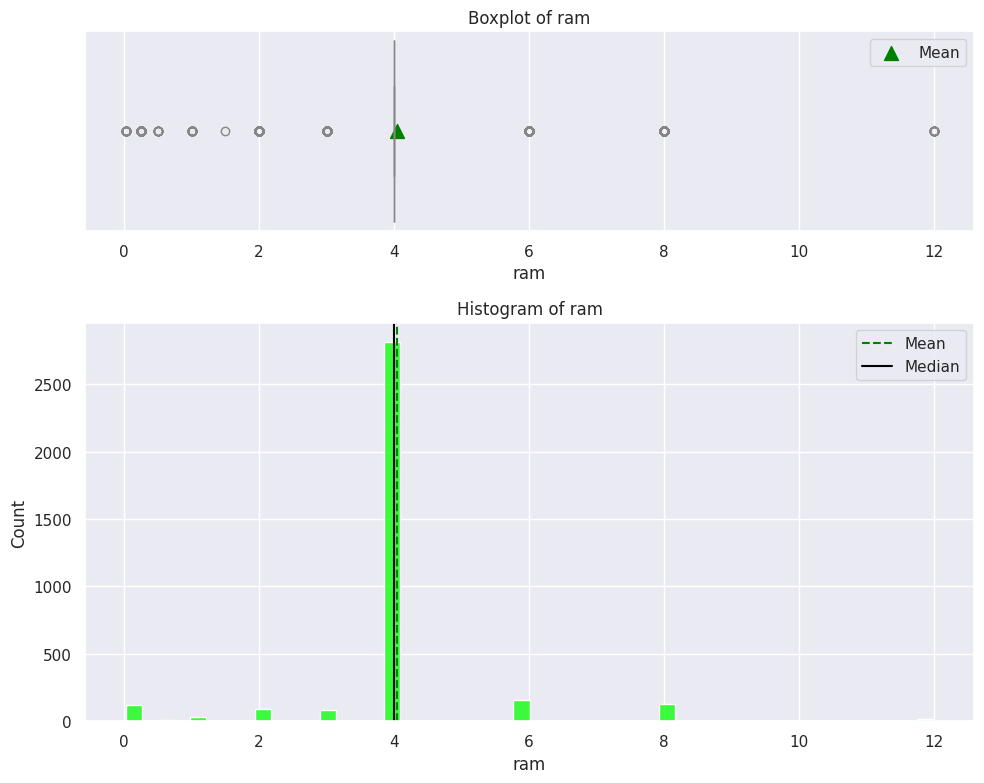

In [ ]:
# Distribution of ram
eda_combined_plot(data, 'ram')

Observations/Insights:

Box Plot:
* Most phones/tablets have RAM values clustered closely, indicating limited variability in the core dataset.
* A few outliers exist with significantly higher RAM (10-12 GB).

Histogram:
* The data shows a clear dominance of devices with 4 GB of RAM, likely due to market demand and affordability.

* High RAM configurations (8 GB and above) are still niche, possibly representing flagship or premium devices.

* Low RAM configurations (<2 GB) are outliers, suggesting they are either very old models or extremely low-cost devices.

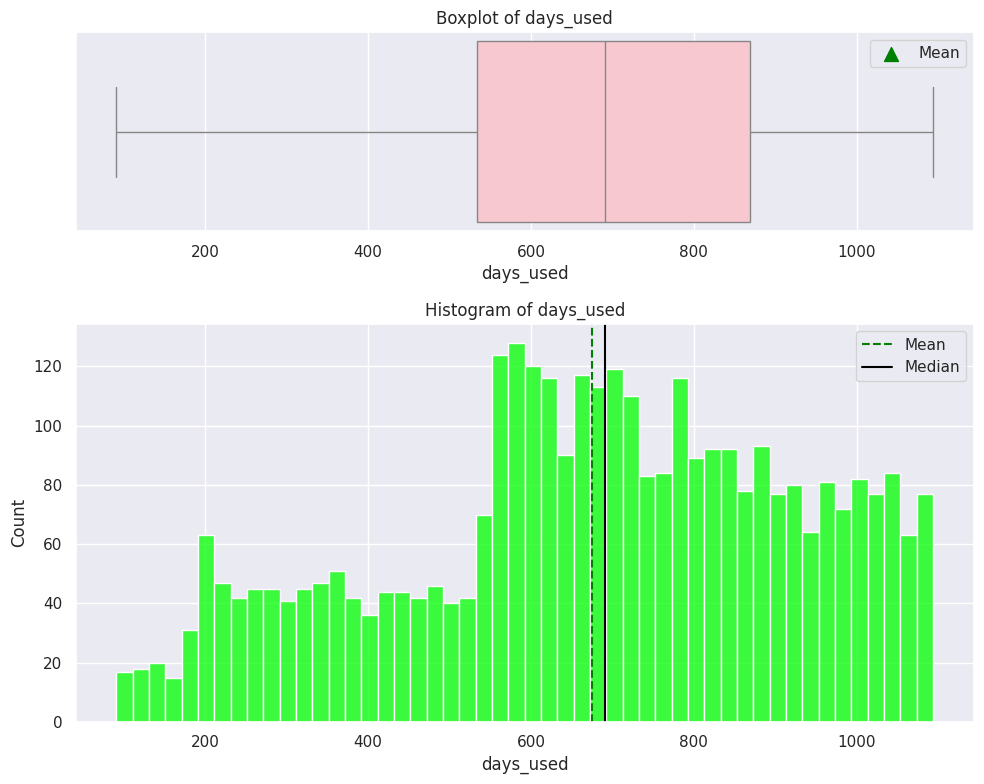

In [ ]:
# Distribution of days used
eda_combined_plot(data, 'days_used')

Observations/Insights:

Box Plot:
* The distribution appears symmetric, with a broad range of usage days.
* No significant outliers, suggesting the data is
consistent

Histogram:
* The majority of phones/tablets have been used for close to 700 days (about 2 years), indicating a common lifecycle before resale or recycling.

* Phones/tablets with exceptionally short or long usage durations are rare, pointing to consistent usage patterns across the dataset.

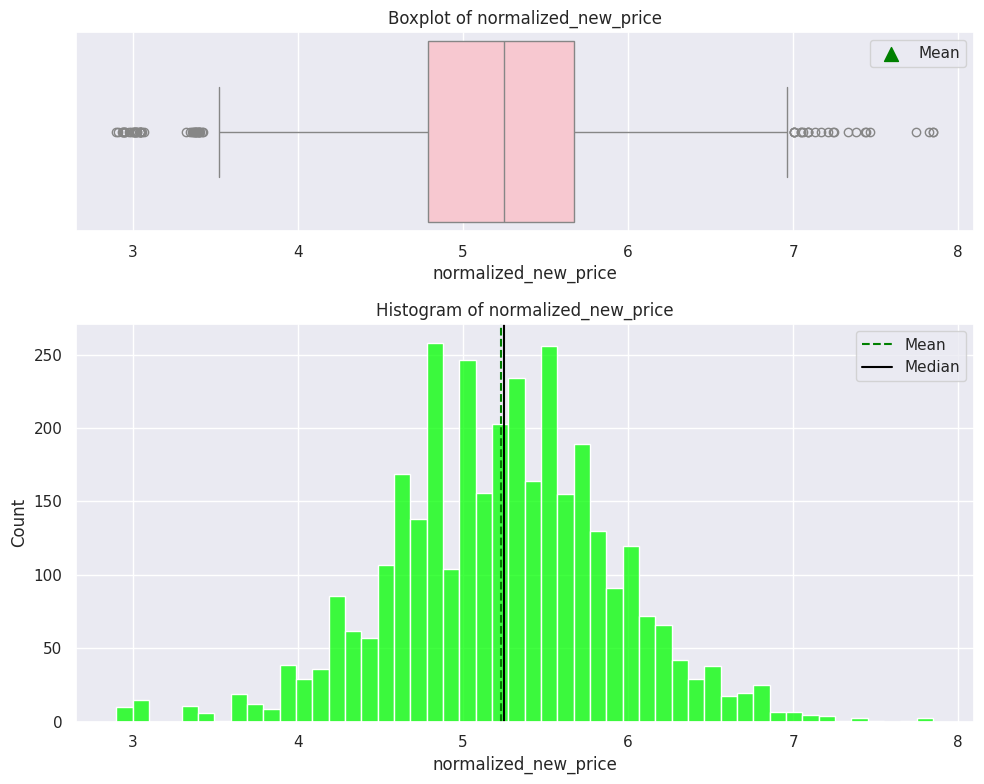

In [ ]:
# Distribution of normalized new device price
eda_combined_plot(data, 'normalized_new_price')

Observations/Insights:

Box Plot:
* Outliers on the higher end of the distribution likely represent flagship or premium models.

* Phones/tablets with normalized prices below 3 may reflect budget models or heavily discounted older models.

Histogram:
* The normalized new price distribution suggests most phones/tablets are mid-range in pricing, with normalized values between 4 and 6 euros.
* A few extreme values (both low and high) are present, likely corresponding to outliers.

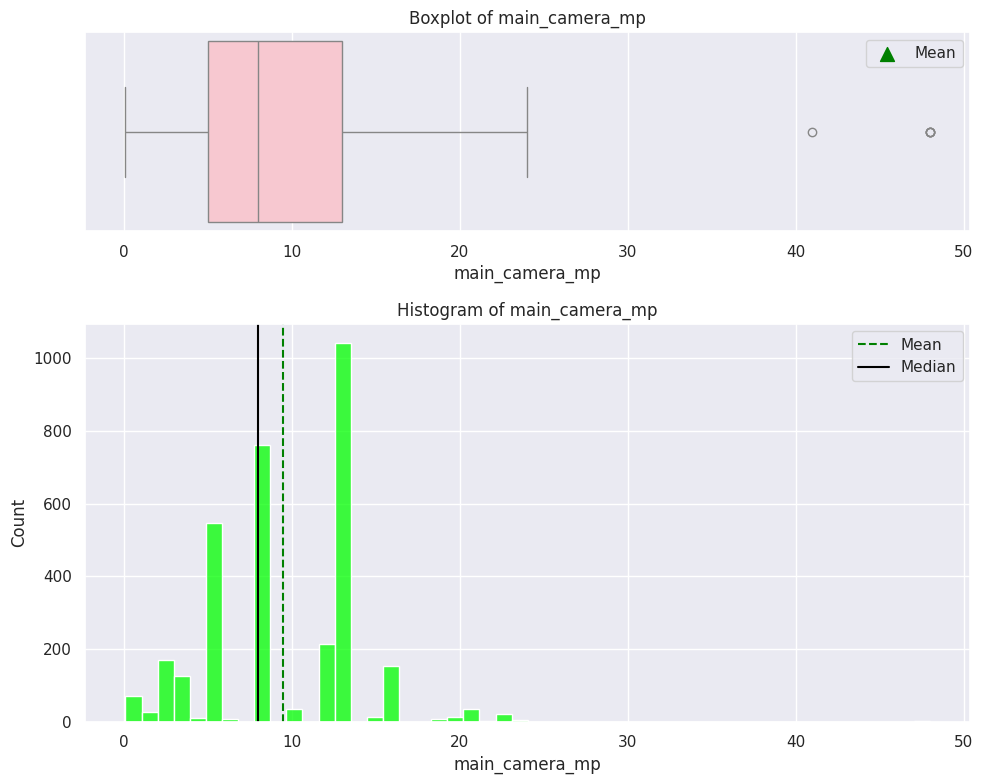

In [ ]:
# Distribution of main_camera_mp
eda_combined_plot(data, 'main_camera_mp')

Observations/Insights:

Box plot:
* Most values are within a specific range, with some higher MP values considered outliers.
* The distribution seems to be skewed slightly to the higher side.

Histogram:
* The most frequent MP values are clustered around 8-10 MP, with a sharp drop beyond 20 MP.
* A smaller number of phones/tablets have high MP cameras (>30 MP).


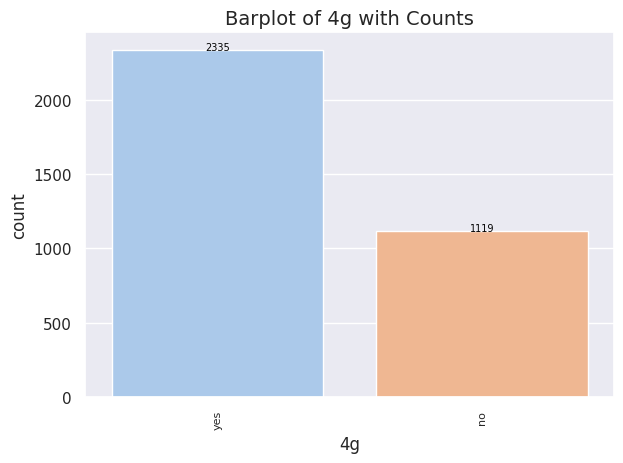

In [ ]:
# Distribution of 4G
labeled_barplot(data, '4g')

Observations/Insights:

* Majority of phones/tablets (2335) in the dataset have 4G connectivity enabled, compared to 1119 devices that do not support 4G indicating that most of the phones/tablets are modern enough to support 4G, which is a desirable feature in the current market.
Ratio:

* Ratio of 4G-enabled phones/tablets to non-4G phones/tablets is approximately 2:1. Suggesting that 4G connectivity is a standard feature for most of the phones/tablets analyzed.

* Since 4G connectivity is a desirable feature, phones/tablets without it may have a lower resale value. The model should capture this as a significant predictor.

* Phones/tablets without 4G could represent older models or budget-friendly options and might appeal to specific market segments with lower connectivity demands.


   screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0        64.0  3.0   3020.0   
1        17.30            13.0              16.0       128.0  8.0   4300.0   
2        16.69            13.0               8.0       128.0  8.0   4200.0   
3        25.50            13.0               8.0        64.0  6.0   7250.0   
4        15.32            13.0               8.0        64.0  3.0   5000.0   

   weight  normalized_used_price  normalized_new_price  
0   146.0               4.307572              4.715100  
1   213.0               5.162097              5.519018  
2   213.0               5.111084              5.884631  
3   480.0               5.135387              5.630961  
4   185.0               4.389995              4.947837  


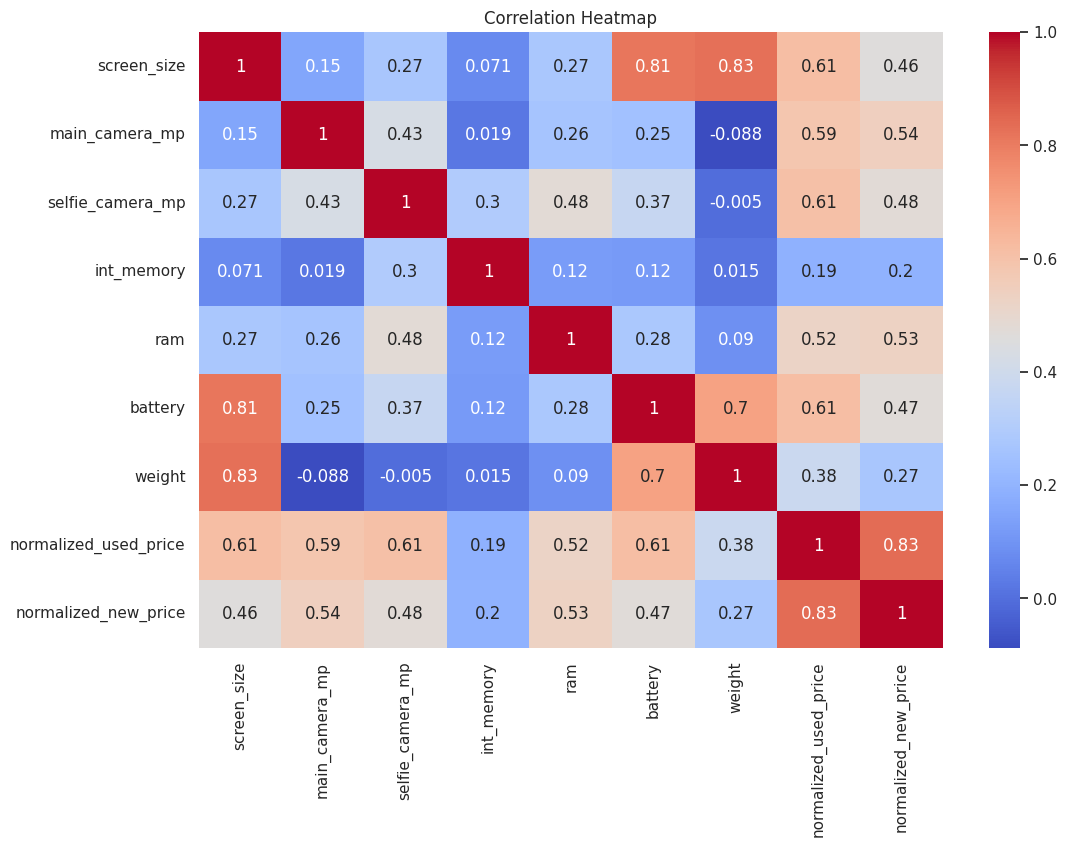

In [ ]:
# Specified list of numerical columns for correlation analysis
numerical_columns = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
     "weight",
    "normalized_used_price",
    "normalized_new_price"
]

# Filter the DataFrame to include only these columns
correlation_data = data[numerical_columns]

# Display the first few rows to confirm the selected data
print(correlation_data.head())

# Visualize
plt.figure(figsize=(12, 8));
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Observations/Insights:

Highly Correlated Features:
  * Screen Size & Weight (0.83) are strongly positively correlated.
  * Screen Size & Battery (0.81)
  * The prices (0.83), new and used, are highly correlated, as expected.

Moderate Correlations:
  * Battery & Weight (0.70)
  * Screen Size & Normalized Used Price (0.61)
  * Main Camera MP & Normalized New Price (0.54)

Weak Correlations:
  * The correlations between internal memory and other features are generally weak, indicating it's less dependent on other aspects like screen size or camera specifications.

  * RAM: Shows weak to moderate correlations with price (used or new), suggesting it's an influencing but not dominant factor.

Negative Correlations:
  * Weight & Main Camera MP (-0.09)

  * **Features like screen size, weight, and battery are more interconnected, likely representing physical aspects of the phone/tablet.**
  * **Prices (both used and new) show moderate to strong relationships with camera specs, RAM, and screen size, which might be key factors in pricing.**

**Q1:** What does the distribution of normalised used device price look like?

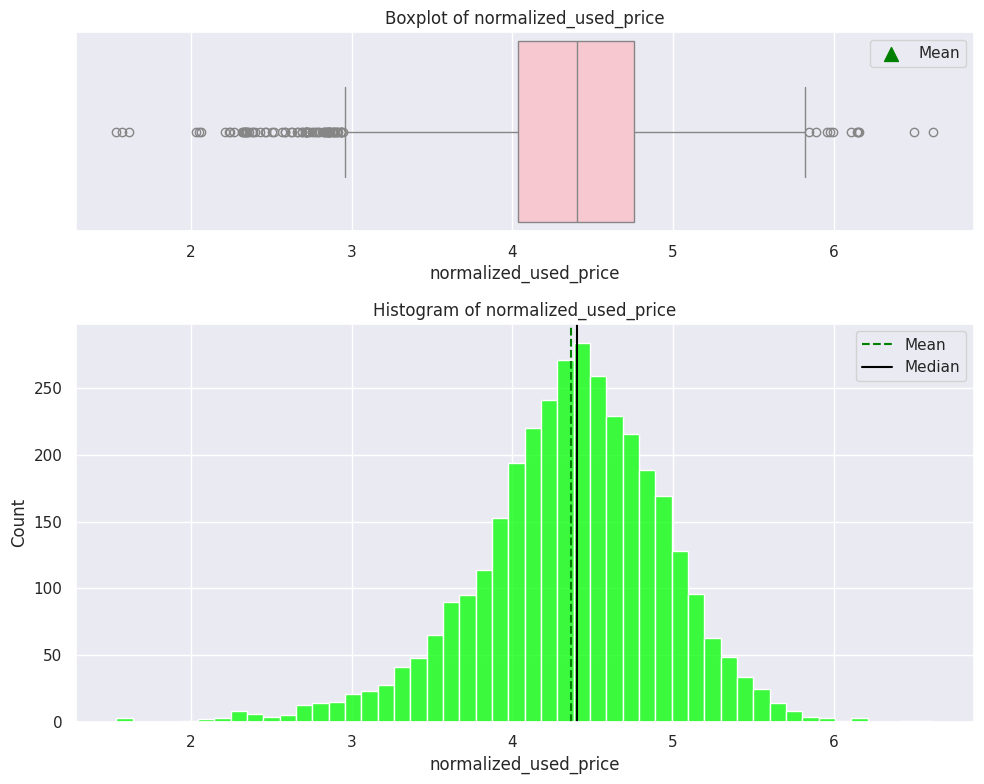

In [ ]:
# Distribution of normalized used device (phones/tablets) price
eda_combined_plot(data, 'normalized_used_price')

Observations/Insights ('Devices' representing 'Phones/Tablets'):

Box Plot:
* The majority of values are concentrated within a reasonable range.
* There are some outliers on both the lower and upper ends, indicating extreme price deviations.

Histogram:
* Devices are most frequently resold at normalized prices around 4.5 euros, suggesting a well-defined market value for used devices.

* Devices with prices below 2 euros may represent older models, damaged devices, or extremely budget-friendly options.

* Prices above 6 euros likely correspond to high-end devices that retain a significant portion of their original value in the resale market.

**Q2:** What percentage of the used device market is dominated by Android devices?

In [ ]:
# Include 'os' column from the original dataset
data = data.loc[data.index]

# Calculate percentage of Android devices in the used device market
total_devices = len(data)
android_devices = len(data[data['os'] == 'Android'])
android_market_share = (android_devices / total_devices) * 100

# Print percentage of Android devices in the used device market
print(f"Percentage of Android devices in the used device market: {android_market_share:.2f}%")


Percentage of Android devices in the used device market: 93.05%


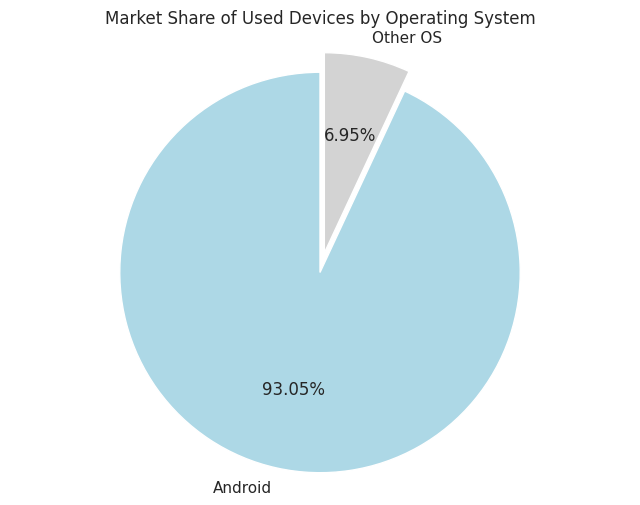

In [ ]:
# Visualization percentage of use devices (emphasis on andriod)

# Calculate the market share of other operating systems
other_market_share = 100 - android_market_share # This line was added to calculate other_market_share

labels = ['Android', 'Other OS']
sizes = [android_market_share, other_market_share]
colors = ['lightblue', 'lightgray']
explode = (0.1, 0)  # Emphasize Android

plt.figure(figsize=(8, 6));
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Market Share of Used Devices by Operating System')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

Observations/Insights:

* Android devices dominate the market, accounting for a significant percentage, while other operating systems make up the remainder.

**Q3:** The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

In [ ]:
# Group by brand and calculate average RAM for each brand
ram_by_brand = data.groupby('brand_name')['ram'].mean().reset_index()

# Sort by RAM for better visualization
ram_by_brand = ram_by_brand.sort_values(by='ram', ascending=False)
ram_by_brand

,brand_name,ram
22,OnePlus,6.363636
23,Oppo,4.961240
30,Vivo,4.756410
11,Huawei,4.655378
10,Honor,4.603448
32,Xiaomi,4.583333
8,Google,4.533333
17,Meizu,4.451613
27,Samsung,4.199413
26,Realme,4.195122


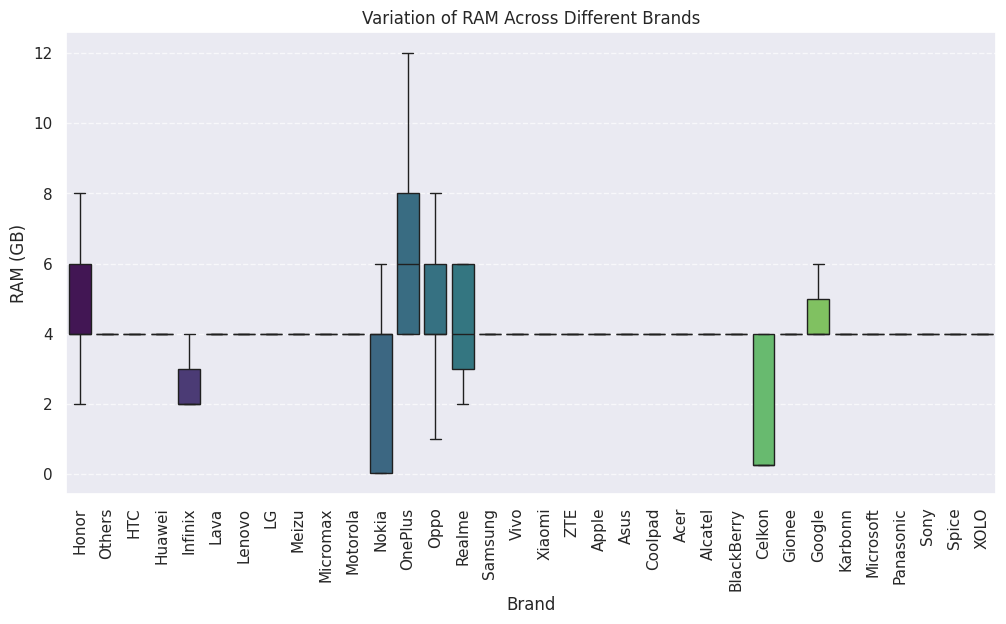

In [ ]:
# Plot variation of RAM with the brand
plt.figure(figsize=(12, 6));
sns.boxplot(data=data, x='brand_name', y='ram', palette='viridis', showfliers=False) # Changed 'pallete' to 'palette'
plt.title('Variation of RAM Across Different Brands')
plt.xlabel('Brand')
plt.ylabel('RAM (GB)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations/Insights:

* Certain brands consistently offer devices with lower RAM, possibly targeting budget-conscious consumers.

* While other brands have a broader range of RAM configurations, catering to both budget and high-performance devices.

* And some brands (e.g., high-end brands) tend to offer devices with higher RAM capacities.

  * Brands like OnePlus and Samsung clearly cater to premium segments, as indicated by higher RAM values.

  * Budget brands like Celkon and BlackBerry remain at the lower end of the spectrum, targeting cost-conscious consumers.

  * High variability in brands like Xiaomi and Samsung indicates their focus on covering multiple market segments (budget, mid-range, and premium).

  * Brands with narrow ranges (e.g., Huawei, HTC) might focus on specific niches or maintain a uniform product strategy.

**Q4:** A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

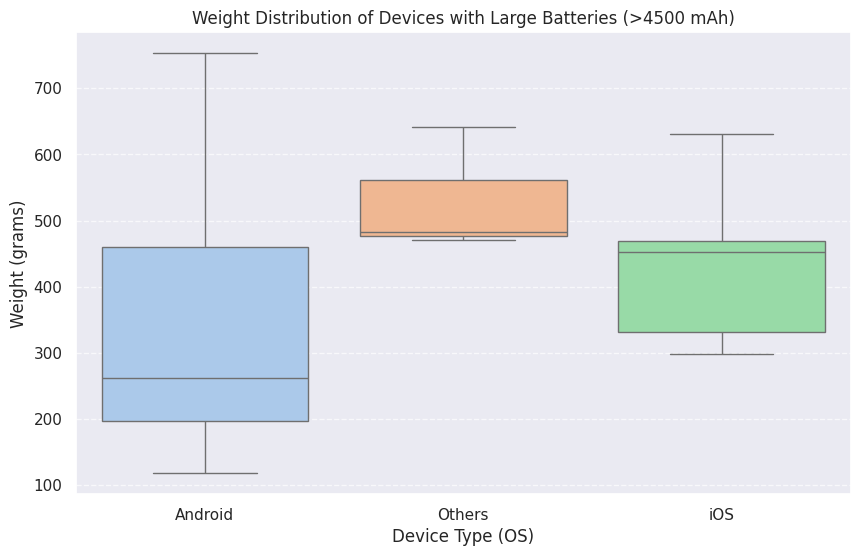

In [ ]:
# Filter data for devices with large batteries (> 4500 mAh)
large_battery_devices = data[data['battery'] > 4500]

# Plot variation of weight for devices with large batteries
plt.figure(figsize=(10, 6));
sns.boxplot(data=large_battery_devices, x='os', y='weight', palette= 'pastel', showfliers=False)
plt.title('Weight Distribution of Devices with Large Batteries (>4500 mAh)')
plt.xlabel('Device Type (OS)')
plt.ylabel('Weight (grams)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observations/Insights:

* Some lighter devices with large batteries might be utilizing advanced materials or compact designs.

*  Devices with larger batteries tend to have higher weights, are heavier.

*  There is variation in weight within the same operating system category, possibly due to differences in form factor (e.g., tablets vs. phones) and materials used.


**Q5:** Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

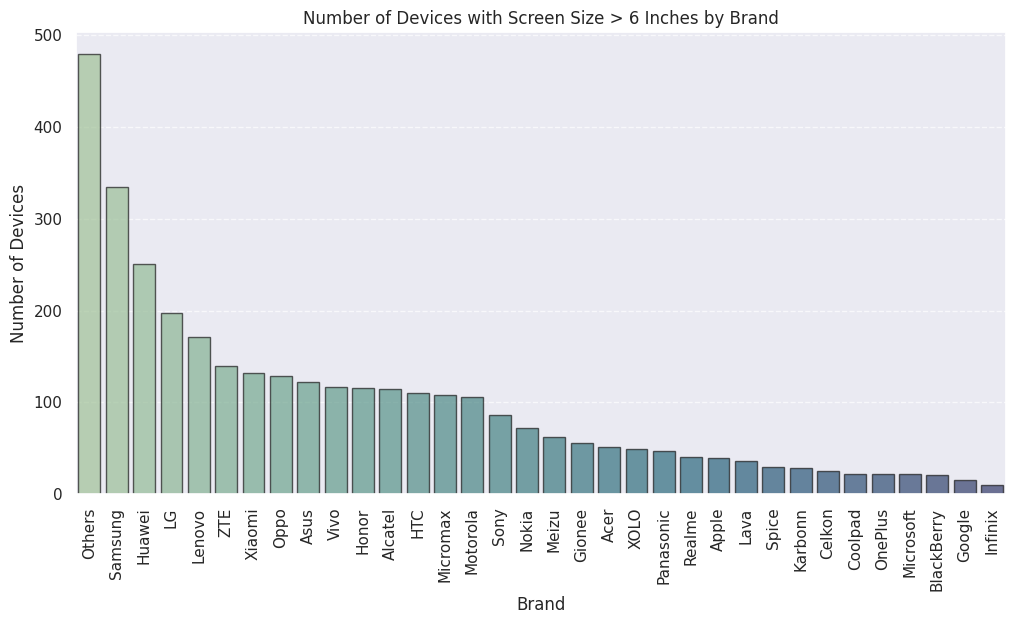

In [ ]:
# Filter data for devices with screen size larger than 6 inches
large_screen_devices = data[data['screen_size'] > 6]

# Count the number of devices by brand
large_screen_device_counts = large_screen_devices['brand_name'].value_counts()

# Plot distribution of large screen devices across brands

plt.figure(figsize=(12, 6));
sns.barplot(x=large_screen_device_counts.index, y=large_screen_device_counts.values, palette='crest', edgecolor='k', alpha=0.7)  # Use Seaborn's barplot
plt.title('Number of Devices with Screen Size > 6 Inches by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Devices')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations/Insights:

*  There are 3,361 tablet devices with screen size greater than 7 inches.
*  There is 1 phone device with screen size between 6 and 7 inches.

Indicative of the fact that most devices with large screens are in the tablet category.


**Q6**: A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

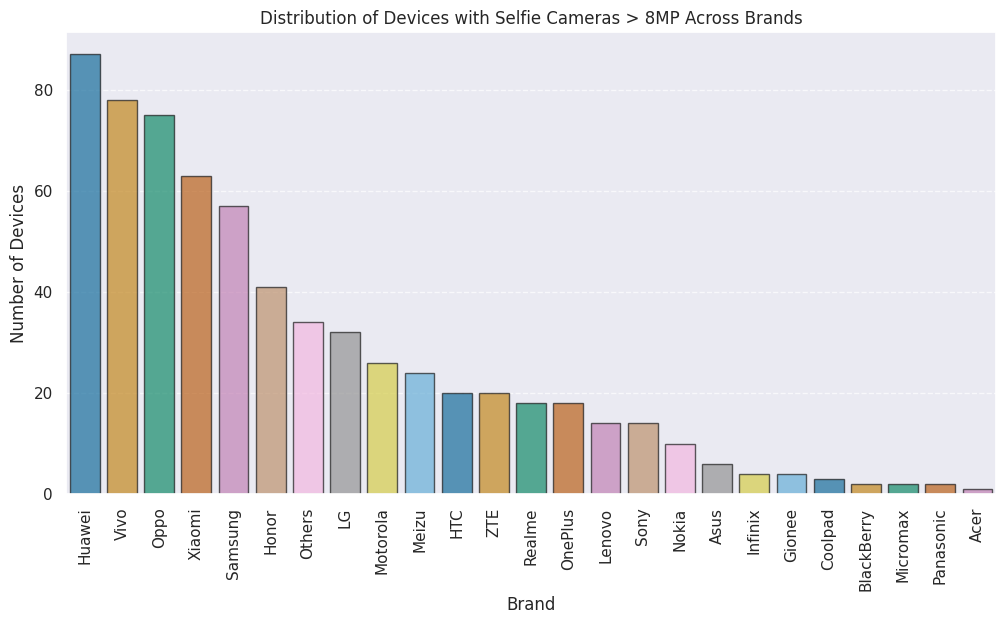

(655, 15)

In [ ]:
# Filter data for devices with selfie cameras greater than 8MP
high_selfie_camera_devices = data[data['selfie_camera_mp'] > 8]

# Count the number of devices by brand with high-resolution selfie cameras
high_selfie_camera_counts = high_selfie_camera_devices['brand_name'].value_counts()

# Plot distribution of devices with high-resolution selfie cameras across brands
plt.figure(figsize=(12, 6))

# Use Seaborn's barplot for palette support
sns.barplot(x=high_selfie_camera_counts.index, y=high_selfie_camera_counts.values, palette='colorblind', edgecolor='k', alpha=0.7)

plt.title('Distribution of Devices with Selfie Cameras > 8MP Across Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Devices')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Filter the data for devices with selfie camera greater than 8MP
high_selfie_camera_devices = data[data['selfie_camera_mp'] > 8]

# Display the shape of the new dataset
high_selfie_camera_devices.shape

Observations/Insights:

*  Some brands dominate the market by offering a wide range of high-resolution selfie camera devices, while others focus less on this feature and provide fewer options in this category.

* There are 655 refurbished phones with selfie cameras greater than 8MP.

**Q7**: Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
# Calculate correlations with 'normalized_used_price'
correlations_with_price = data.corr(numeric_only=True)['normalized_used_price'].sort_values(ascending=False)

# Display highly correlated attributes
# Set threshold for high correlation
highly_correlated_attributes = correlations_with_price[correlations_with_price.abs() > 0.5]
highly_correlated_attributes


,normalized_used_price
normalized_used_price,1.000000
normalized_new_price,0.834496
screen_size,0.614785
battery,0.613619
selfie_camera_mp,0.608074
main_camera_mp,0.587302
ram,0.520289
release_year,0.509790


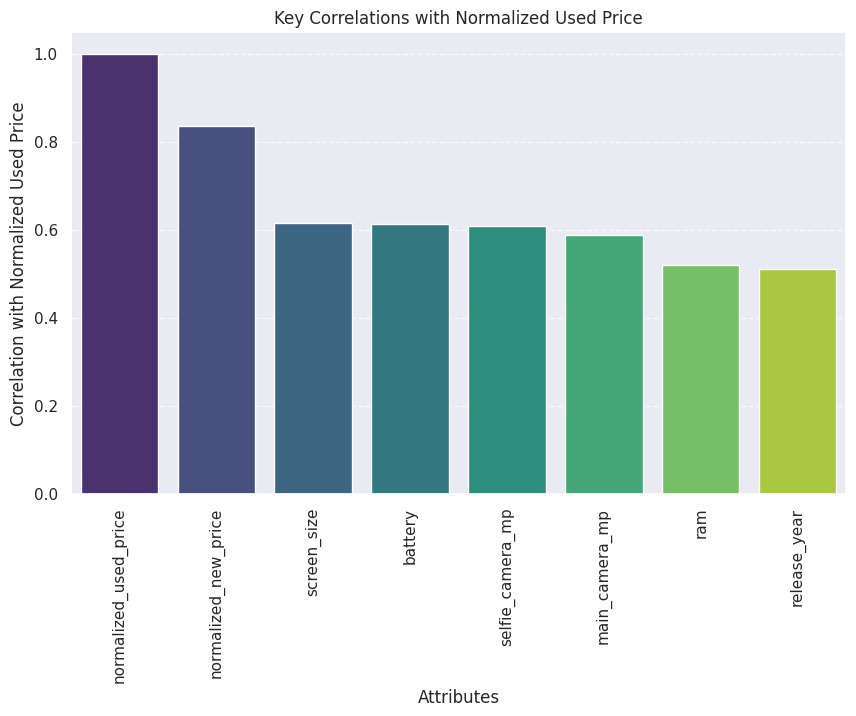

In [ ]:
# Visualize key correlations
plt.figure(figsize=(10, 6));
sns.barplot(x=highly_correlated_attributes.index, y=highly_correlated_attributes.values, palette="viridis")
plt.title('Key Correlations with Normalized Used Price')
plt.xlabel('Attributes')
plt.ylabel('Correlation with Normalized Used Price')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations/Insights:

* Normalized New Price: 0.83 (Strong positive correlation).
* Screen Size: 0.61 (Moderate positive correlation).
* Battery: 0.61 (Moderate positive correlation).
* Selfie Camera MP: 0.61 (Moderate positive correlation).
* Main Camera MP: 0.59 (Moderate positive correlation).
* Release Year: 0.51 (Moderate positive correlation).
* RAM: 0.52 (Moderate positive correlation).

**These attributes are crucial in determining the resale value of used devices.**

## Data Preprocessing

- Missing value treatment (if needed).
- Feature engineering (if needed).
- Outlier detection and treatment (if needed).
- Preparing data for modeling.
- Any other preprocessing steps (if needed).

####Missing Value Treatment

In [ ]:
# Check for missing values
df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


* Missing values observed, will treat

In [ ]:
# Handle missing values

# Impute missing values for numerical columns with median
numerical_columns = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Confirm missing values are handled
missing_values_after_imputation = df.isnull().sum()

missing_values_after_imputation, df.shape


(brand_name               0
 os                       0
 screen_size              0
 4g                       0
 5g                       0
 main_camera_mp           0
 selfie_camera_mp         0
 int_memory               0
 ram                      0
 battery                  0
 weight                   0
 release_year             0
 days_used                0
 normalized_used_price    0
 normalized_new_price     0
 dtype: int64,
 (3454, 15))

Observations:

* All missing values have been filled. The dataset no longer has any missing entries.


####Outlier Detection

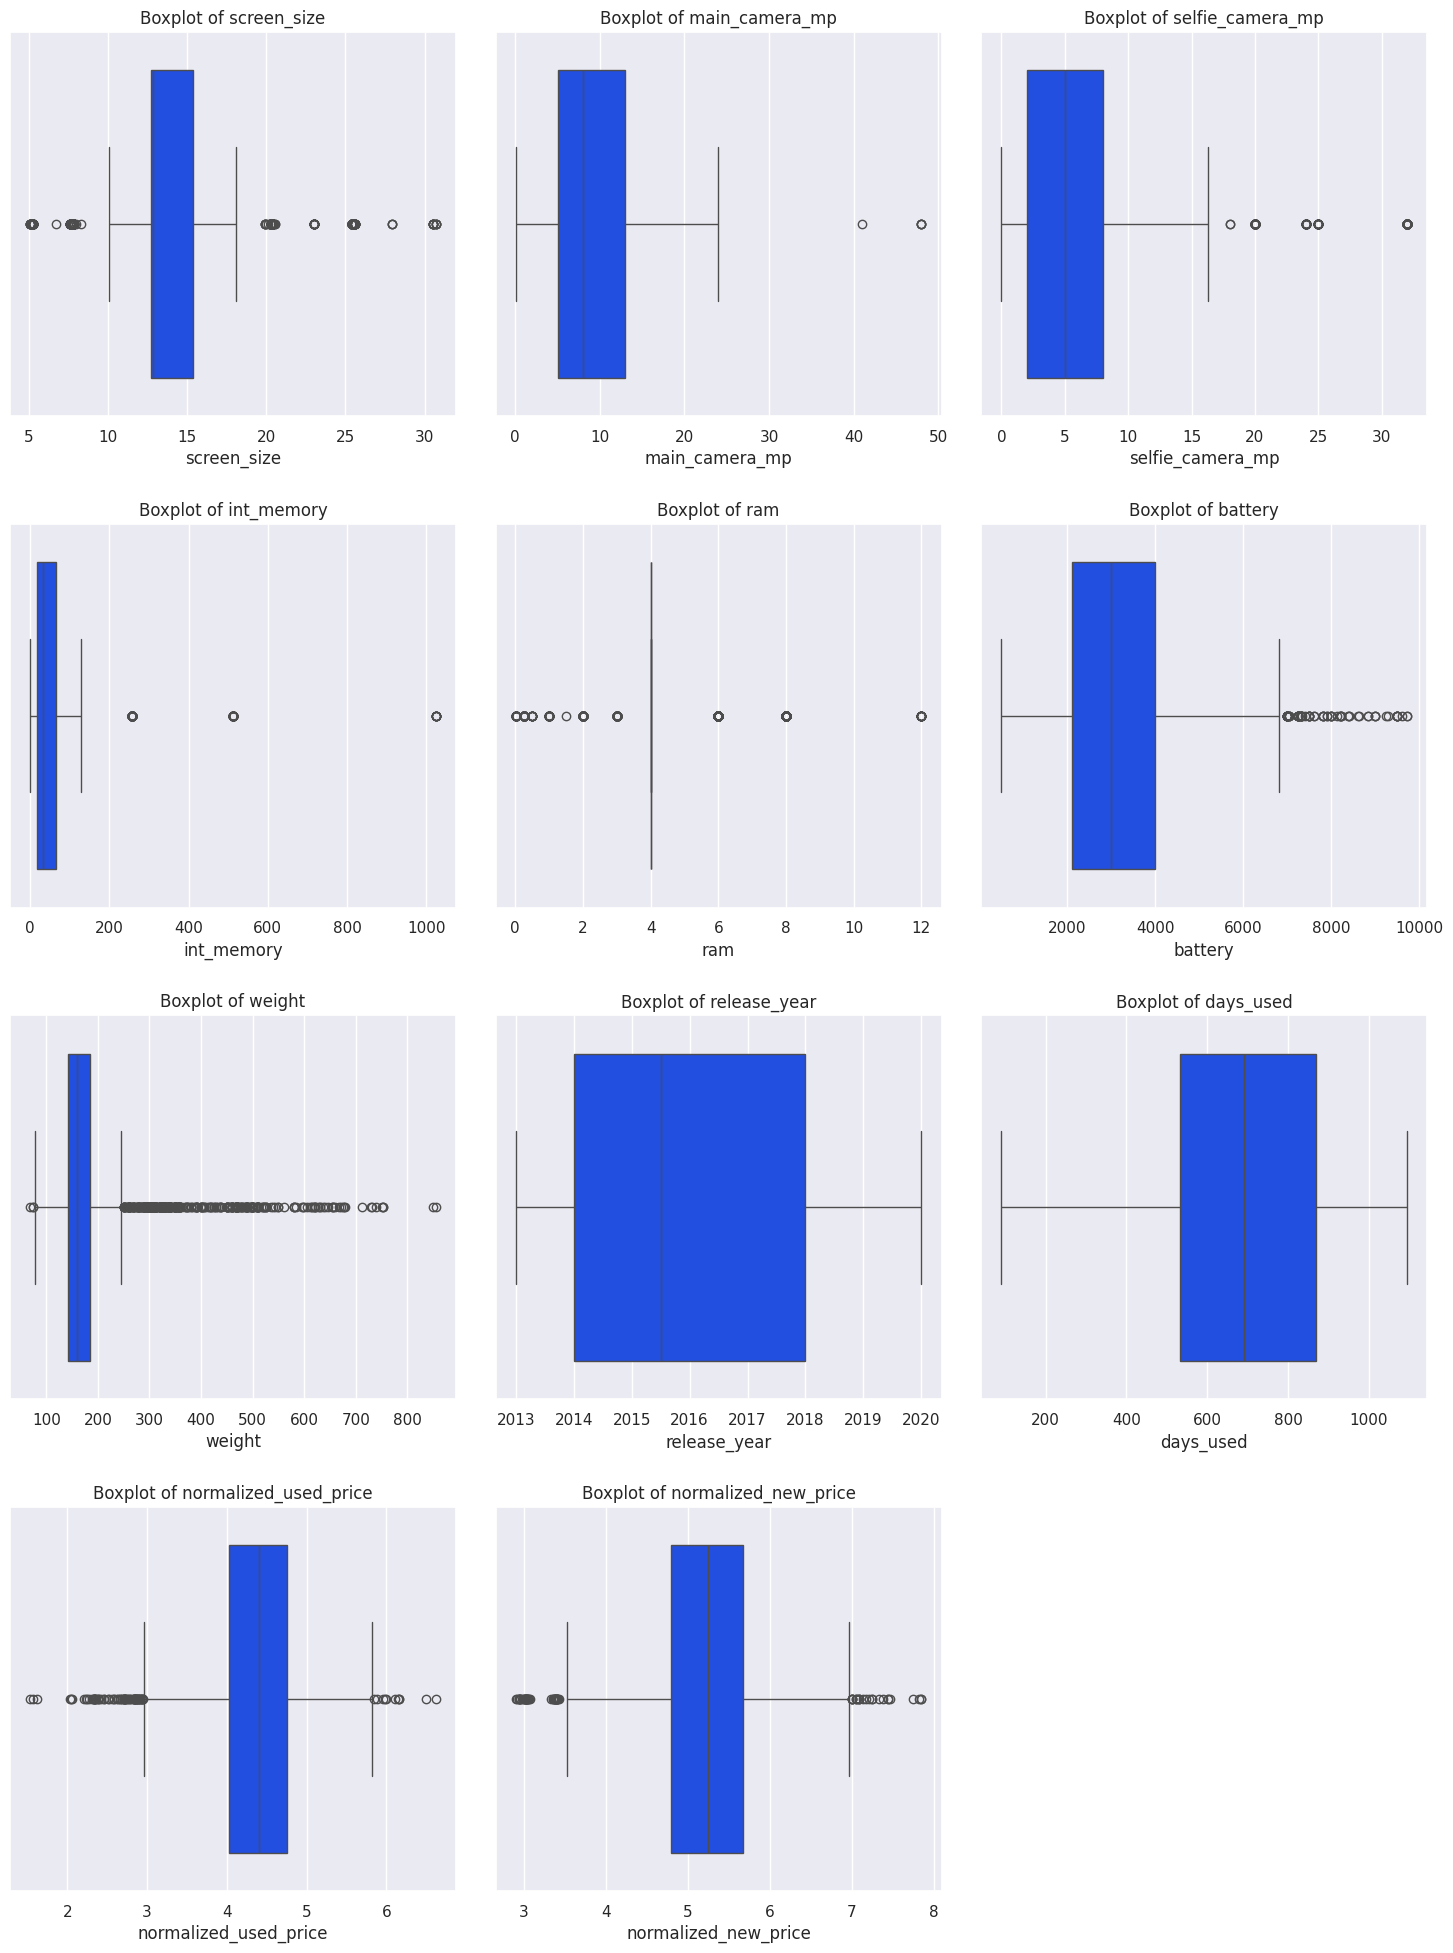

In [ ]:
# Outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows and columns needed for the subplots
num_rows = int(np.ceil(len(num_cols) / 3))  # Calculate rows needed, round up
num_cols_grid = min(len(num_cols), 3)

plt.figure(figsize=(15, 5 * num_rows));  # Adjust figure height based on rows

for i, variable in enumerate(num_cols):
    plt.subplot(num_rows, num_cols_grid, i + 1)  # Use calculated rows and columns
    sns.boxplot(data=df, x=variable, palette='bright')
    plt.title(f'Boxplot of {variable}')
    plt.tight_layout(pad=2)

plt.show()

Observations/Insights:

* **Observed outliers in the data. However, will not treat them as they could be proper values.**

* **Keeping outliers as they are, because, they may contain information such as ram, weight, screen size, price etc, which are valid and meaningful.**

####INF and NAN Value Check/Treatment


In [ ]:
# Check for inf/nan values in the dataframe
inf_check = df.select_dtypes(include=np.number).apply(np.isinf).any()
nan_check = df.select_dtypes(include=np.number).apply(np.isnan).any()

# Treating inf/nan values
# Replace `inf` and `-inf` with `NaN`
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace `NaN` values with column mean for numeric columns only
df.fillna(df.mean(numeric_only=True), inplace=True) #This will consider only numeric columns while calculating mean

# Verify no `inf` or `NaN` values remain
assert not df.isin([np.inf, -np.inf]).any().any(), "There are still infinite values"
assert not df.isnull().any().any(), "There are still missing values"

print("All `inf` and `NaN` values have been systematically replaced.")



All `inf` and `NaN` values have been systematically replaced.


## Prepare Dataset for Modeling

* Recall the objective is to predict the price of a used phone/tablet and identify factors that significantly influence it.

 To prepare dataset to meet the objective:
  * Encode categorical features.
  * Split the data into train and test to be able to evaluate the model that will be built on the train data


In [ ]:
# Library to encode variables
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Standardize Data Types (ensure numerical columns are correct)
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(data, columns=['brand_name', 'os', '4g', '5g'], drop_first=True)

# Normalize/Scale Numerical Data
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [ ]:
# Preparation for splitting the data
# Define the target variable and features
X = df_encoded.drop(columns=['normalized_used_price'])
y = df_encoded['normalized_used_price']

print(X.head())
print(y.head())

   screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0        64.0  3.0   3020.0   
1        17.30            13.0              16.0       128.0  8.0   4300.0   
2        16.69            13.0               8.0       128.0  8.0   4200.0   
3        25.50            13.0               8.0        64.0  6.0   7250.0   
4        15.32            13.0               8.0        64.0  3.0   5000.0   

   weight  release_year  days_used  normalized_new_price  ...  \
0   146.0          2020        127              4.715100  ...   
1   213.0          2020        325              5.519018  ...   
2   213.0          2020        162              5.884631  ...   
3   480.0          2020        345              5.630961  ...   
4   185.0          2020        293              4.947837  ...   

   brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
0                 0                0                0           

In [ ]:
# Add a constant/intercept for the OLS model
X = sm.add_constant(X)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Normalization
# Check that all float-like columns are properly normalized for modeling framework
float_columns = df[df.columns[df.columns.isin(numerical_columns)]].select_dtypes(include=['float'])

# Check the range of values for each column to verify normalization
float_column_ranges = float_columns.apply(lambda x: (x.min(), x.max()))

# Display the ranges for float-like columns
float_column_ranges

,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0


* Normalization on columns for modeling verified.

In [ ]:
# Splitting the data into 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [ ]:
# readdress/handle inf/nan values in x_train/handle inf/nan in x_test, that may have appeared while preparing the dataset for modelling
x_train = x_train.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
x_train = x_train.fillna(x_train.mean())  # Impute NaN with column means
x_test = x_test.replace([np.inf, -np.inf], np.nan) # Replace inf with NAN
x_test = x_test.fillna(x_test.mean()) # Use train set mean for imputation

# Convert all columns in x_train/x_test to float64
x_train = x_train.astype(float)
x_test = x_test.astype(float)

## Model Building - Linear Regression

### Base OLS model (ols_model):
* Build Linear Regression model using the train data.

In [ ]:
# Base OLS Model
ols_model = sm.OLS(y_train, x_train).fit()
print(ols_model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.849
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     276.8
Date:                   Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                           15:51:37   Log-Likelihood:                 123.88
No. Observations:                   2417   AIC:                            -149.8
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Interpreting the Regression Results:

* R-squared: The model explains 84.9% of the variance in the normalized used price of the devices, which is a strong result.

* Significant Predictors:
  * Features like screen_size, main_camera_mp, selfie_camera_mp, ram, weight, release_year, and normalized_new_price are significant predictors (p-value < 0.05).
* The presence of 4g is also statistically significant.
* The condition number is quite high, which might indicate multicollinearity or scaling issues.





## Model Performance Check

* Check the performance of the model using different metrics.

####Objective Evaluation Criteria:
* Models with higher R-squared and Adjusted R-squared values are better for explaining variance in the dependent variable (normalized_used_price).

* Coefficients should be interpretable to identify the most significant factors influencing price.

* Residuals should exhibit normality and minimal skewness to ensure unbiased predictions.

* A model with fewer, yet significant predictors is preferred for ease of implementation.

In [ ]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # Predict using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # Create a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Check model performance on train set (seen 70% data)
print("Training Performance\n")
ols_model_train_perf = model_performance_regression(ols_model, x_train, y_train)
ols_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229882,0.178347,0.848727,0.845596,4.289704


In [ ]:
# Check model performance on test set (seen 30% data)
print("Test Performance\n")
ols_model_test_perf = model_performance_regression(ols_model, x_test, y_test)
ols_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238478,0.18847,0.832994,0.824703,4.510836


Observations/Insights:

* Model Fit:

  * The R-squared and Adjusted R-squared values are high for both the training and test sets (~0.83 to 0.85), indicating that the model explains a large proportion of the variance in the target variable.
  * The slight drop in R-squared from the training set to the test set suggests the model generalizes well but could still be improved slightly.

* Errors:

  * The RMSE and MAE are low, showing that the model's predictions are close to the actual values.
  * The MAPE values (~4.3% for training and ~4.5% for testing) indicate that, on average, the predictions are within ~4.5% of the actual values.

* Overfitting:

  * The performance metrics for the training and test sets are comparable, which means the model does not show signs of overfitting.

**Overall, the model performs well and can reliably predict the normalized used price of devices.**

## Checking Linear Regression Assumptions:

To ensure the importance that the assumptions of linear regression are satisfied,  check the following Linear Regression assumptions:

* **No Multicollinearity**
  * General Rule of thumb:
    * If VIF is between 1 and 5, then there is low multicollinearity.
    * If VIF is between 5 and 10, we say there is moderate multicollinearity.
    * If VIF is exceeding 10, it shows signs of high multicollinearity.

* **Linearity of variables**

* **Independence of error terms**

* **Normality of error terms**

* **No Heteroscedasticity**

#### TEST FOR MULTICOLLINEARITY

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,3.803475e+06
1,screen_size,8.257756e+00
2,main_camera_mp,2.315276e+00
3,selfie_camera_mp,2.867771e+00
4,int_memory,1.362418e+00
5,ram,2.249443e+00
6,battery,4.055476e+00
7,weight,6.401901e+00
8,release_year,4.865021e+00
9,days_used,2.588858e+00


Observations:

* There are multiple columns with high VIF values, indicating presence of strong multicollinearity
* Systematically drop numerical columns with VIF > 5 that makes the least change in adjusted R-squared.
* Check the VIF scores again.
* Continue till all VIF scores under 5
* **HOWEVER, will ignore the VIF values for dummy variables and the constant (intercept).**

####Removing Multicollinearity


In [ ]:
# Define function
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # Empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # Build ols models by dropping one of the high VIF columns at a time
    # Store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # Defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # Create the model
        ols_model = sm.OLS(target, train).fit()

        # Adding adj. R-squared and RMSE to the lists
        adj_r2.append(ols_model.rsquared_adj)
        rmse.append(np.sqrt(ols_model.mse_resid))

    # Creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
# List the speified columns with high vif in question
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.843407,0.233938
1,screen_size,0.841297,0.235508


In [ ]:
# Systematically drop specified colum
col_to_drop = "weight"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,3.706857e+06
1,screen_size,3.680347e+00
2,main_camera_mp,2.241555e+00
3,selfie_camera_mp,2.835046e+00
4,int_memory,1.362351e+00
5,ram,2.245610e+00
6,battery,3.760515e+00
7,release_year,4.738598e+00
8,days_used,2.570721e+00
9,normalized_new_price,3.228002e+00


Observations/Insights:
* No more multicollinearity in the data
* Rebuild the model using the updated set of predictors variables

#####Rebuild Model
* Rebuild the model using the updated set of predictors variables

In [ ]:
ols_model1 = sm.OLS(y_train, x_train2).fit()
print(ols_model1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     277.9
Date:                   Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                           15:51:39   Log-Likelihood:                 105.84
No. Observations:                   2417   AIC:                            -115.7
Df Residuals:                       2369   BIC:                             162.2
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

- Adj. R-squared has dropped from 0.849 to 0.846, which shows that the dropped column (weight) did not have much effect on the model
- With no multicollinearity issues to address, look at the p-values of predictor variables to check their significance

### Dealing with high p-value variables

- There are some dummy variables in the data having p-value > 0.05. which are not significant, they can be dropped:
    - Rebuild model again, check the p-values of the variables, and drop the column with the highest p-value;
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value;
    - Repeat the above two steps till there are no columns with p-value > 0.05
    - Check model performance

**Note**: sometimes p-values of other variables change after dropping a variable, hence the iterative process.

In [ ]:
# Initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# Set an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # Define the train set
    x_train_aux = predictors[cols]

    # Fit the model
    modelP = sm.OLS(y_train, x_train_aux).fit()

    # Get the p-values and the maximum p-value
    p_values = modelP.pvalues
    max_p_value = max(p_values)

    # Get the feature with maximum p-value
    feature_with_p_max = p_values.idxmax()

    # Backward elimination
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'release_year', 'normalized_new_price', 'brand_name_Celkon', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


In [ ]:
# Create new training and testing datasets with only the selected features
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]


In [ ]:
# Rebuild model
ols_model2 = sm.OLS(y_train, x_train3).fit()
print(ols_model2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     1184.
Date:                   Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                           15:51:39   Log-Likelihood:                 87.847
No. Observations:                   2417   AIC:                            -151.7
Df Residuals:                       2405   BIC:                            -82.21
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Observations/Insights:

* No feature has p-value greater than 0.05, therefore the features in *x_train3* is the final set of predictor variables and *ols_model2* is the final model to move forward with
* Adjusted R-squared is 0.844, this model explains ~84% of the variance.


In [ ]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
ols_model2_train_perf = model_performance_regression(ols_model2, x_train3, y_train)
ols_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233334,0.181174,0.84415,0.843372,4.361294


In [ ]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
ols_model2_test_perf = model_performance_regression(ols_model2, x_test3, y_test)
ols_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240939,0.190747,0.82953,0.827533,4.564339


Observations/Insights:
* The adjusted R-squared in ols_model1 indicates that the variable (weight) dropped was not affecting the model.
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting.

###Test for Linearity and Independence:


In [ ]:
# Create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = ols_model2.fittedvalues  # predicted values
df_pred["Residuals"] = ols_model2.resid  # residuals

# Calculate residuals
df_pred['Residuals'] = df_pred['Actual Values'] - df_pred['Fitted Values']
df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.306228,-0.044253
3141,4.175156,3.817443,0.357713
1233,4.117410,4.438389,-0.320980
3046,3.782597,3.837135,-0.054538
2649,3.981922,3.935027,0.046895


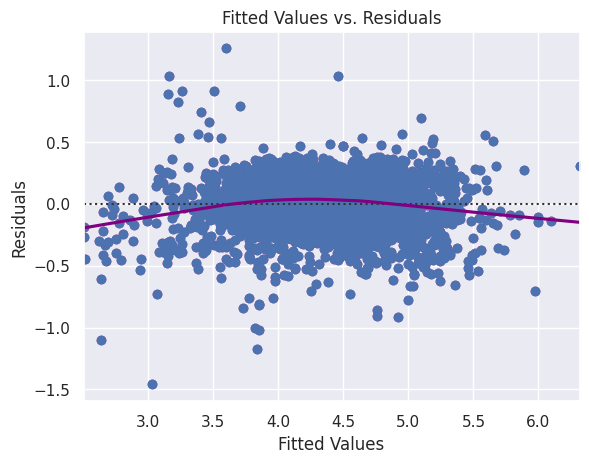

In [ ]:
# Plot the fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.scatter(df_pred["Fitted Values"], df_pred["Residuals"])
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values vs. Residuals")
plt.show()

Observations/Insights:

* The residuals (differences between actual and predicted values) are mostly scattered around the horizontal zero line, a good indication that the model;s errors are unbiased.

* The slight curvature implies that the model is not fully accounting for some non-linear effects in the data.

* No patterns observed. Hence, the assumptions of linearity and independence are satisfied.

###Test for Normality

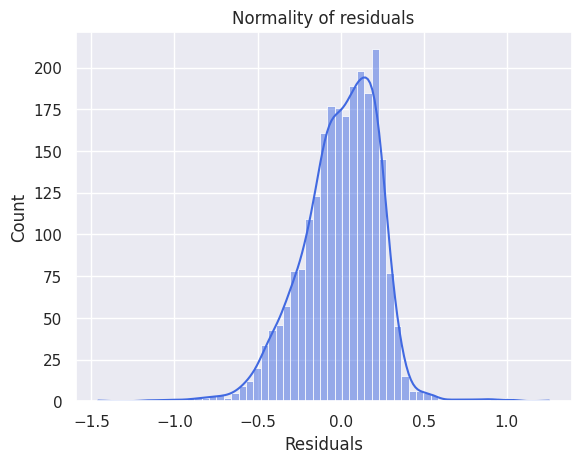

In [ ]:
# Visualize with histogram and Q-Q Plot

# Histogram
sns.histplot(data=df_pred, x="Residuals", color= 'royalblue', kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals does have a bell shape.


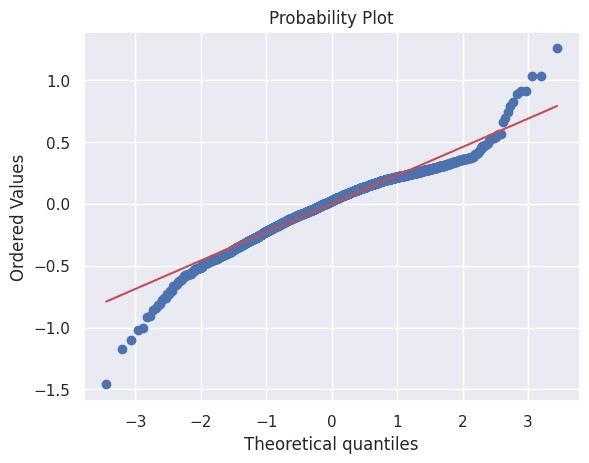

In [ ]:
# Check Q-Q Plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* An almost straight line except for the tails is observed for the residuals.

#### Normality Tests:

* Perform statistical tests (e.g., Shapiro-Wilk) to confirm normality of residuals.

* Null Hypothesis (H₀): The data is normally distributed.
* Alternative Hypothesis (H₁): The data is not normally distributed.
* Test Statistic (W): Measures how well the data conforms to normality.

p-value:
* If p-value > 0.05: Fail to reject H₀, residuals are likely normally distributed.
* If p-value ≤ 0.05: Reject H₀, residuals deviate significantly from normality.

In [ ]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test on residuals
shapiro_test_statistic, shapiro_p_value = shapiro(df_pred['Residuals'])

# Output the test results
print("Shapiro-Wilk Test Statistic:", shapiro_test_statistic)
print("Shapiro-Wilk Test p-value:", shapiro_p_value)

# Interpretation
if shapiro_p_value > 0.05:
    print("Residuals appear to be normally distributed (fail to reject null hypothesis).")
else:
    print("Residuals do not appear to be normally distributed (reject null hypothesis).")


Shapiro-Wilk Test Statistic: 0.9652272336089458
Shapiro-Wilk Test p-value: 1.065561230176558e-23
Residuals do not appear to be normally distributed (reject null hypothesis).


* p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* **However, approximately, this distribution is as close to being normal as possible. Therefore assumption is satisfied.**

###TEST FOR HOMOSCEDASTICITY

* if p-value > 0.05 the residuals are homoscedastic. Else, they are heteroscedastic.
  * Null hypothesis: Residuals are homoscedastic.
  * Alternate hypothesis: Residuals have heteroscedasticity.

* Address Heteroscedasticity by adding other important features or making transformations.

In [ ]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_goldfeldquandt # Import the function

name = ["F statistic", "p-value"]
test = het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 0.931481916943131), ('p-value', 0.8901244264459731)]

In [ ]:
# Interpretation

if test[1] > 0.05:
    print("Fail to reject null hypothesis: No evidence of heteroscedasticity.")
else:
    print("Reject null hypothesis: Evidence of heteroscedasticity.")

Fail to reject null hypothesis: No evidence of heteroscedasticity.


 **Observed p-value > 0.05, therefore, the residuals are homoscedastic. Assumption is satisfied.**

## Predictions on test data

* All the assumptions of linear regression have been checked and they are satisfied.


In [ ]:
# Predictions on the test set
pred = ols_model2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1174,4.553772,4.488032
2247,4.330996,4.129724
2991,4.180828,4.045861
2997,4.291007,4.218974
2982,4.649761,4.517081
479,4.284689,4.217363
17,4.777020,4.722018
471,4.721886,4.486031
2918,4.482550,4.517748
602,3.852485,4.181758


Observations/Insights:
* **Observed ols_model2 returned good prediction results, showing comparable the actual and predicted values.**

## Final Model

* Recreate the final model and print it's summary to gain insights.

In [ ]:
# Recreate the final model from ols_model2 good prediction
final_model = sm.OLS(y_train, x_train3).fit()
print(final_model.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     1184.
Date:                   Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                           15:51:41   Log-Likelihood:                 87.847
No. Observations:                   2417   AIC:                            -151.7
Df Residuals:                       2405   BIC:                            -82.21
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# Checking final model performance on train set (seen 70% data)
print("Training Performance\n")
ols_model2_final_train_perf = model_performance_regression(
    final_model, x_train3, y_train
)
ols_model2_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233334,0.181174,0.84415,0.843372,4.361294


In [ ]:
# Checking final model performance on test set (seen 30% data)
print("Test Performance\n")
ols_model2_final_test_perf = model_performance_regression(
    final_model, x_test3, y_test
)
ols_model2_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240939,0.190747,0.82953,0.827533,4.564339


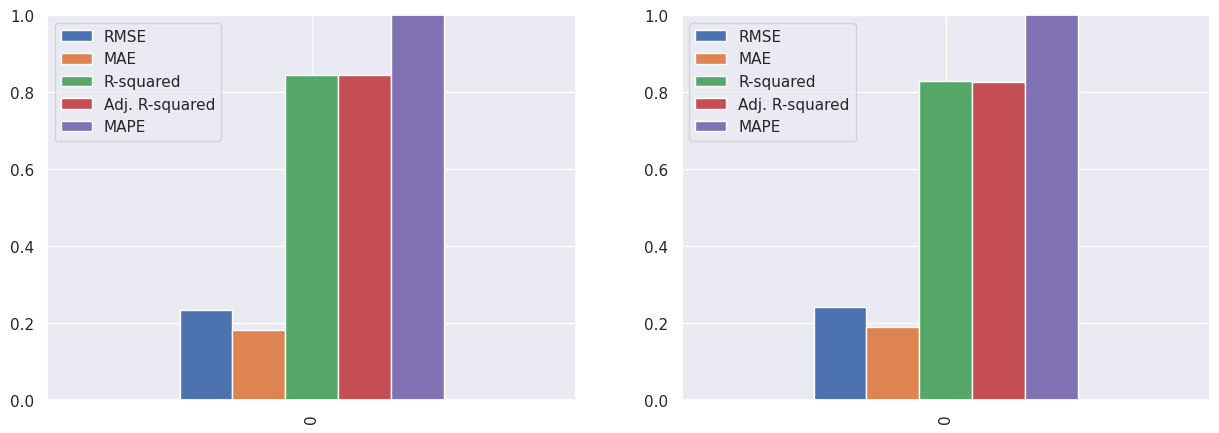

In [ ]:
# Visualize final model on Train and Test set prediction performances
fig, ax = plt.subplots(1, 2, figsize=(15, 5));
ols_model2_final_train_perf.plot(kind="bar", ylim=(0, 1), ax=ax[0]);
ols_model2_final_test_perf.plot(kind="bar", ylim=(0, 1), ax=ax[1]);
plt.show()


**Final Key Observations/Insights:**

* Training Performance:
    * Root Mean Squared Error (RMSE): 0.233334
    * Mean Absolute Error (MAE): 0.181174
    * R-squared: 0.84415
    * Adjusted R-squared: 0.843372
    * Mean Absolute Percentage Error (MAPE): 4.361294
* Test Performance:
    * Root Mean Squared Error (RMSE): 0.240939
    * Mean Absolute Error (MAE): 0.190747
    * R-squared: 0.82953
    * Adjusted R-squared: 0.827533
    * Mean Absolute Percentage Error (MAPE): 4.564339

Analysis:
* Good Model Fit:
    * The R-squared values for both the training set (0.844) and test set (0.829) indicate that the model explains a significant portion of the variance in the target variable.
    * The small difference between training and test R-squared values demonstrates good generalization performance.
*Low Error Values:
    * Both RMSE and MAE are low, indicating that the model's predictions are close to the actual values.
    * MAPE values (~4.4% for training and ~4.6% for testing) confirm that the predictions are accurate, with less than 5% average error relative to actual values.

Overfitting:
* The metrics are consistent across the training and test sets, showing no significant overfitting.


**The final model performs well and can be reliably used for predicting normalized used prices.**

## Actionable Insights, Recommendations and Conclusion

**Actionable Insights from the Final Regression Model:**

* Key Predictors:
  * Variables like screen_size, main_camera_mp, selfie_camera_mp, ram, release_year, normalized_new_price, and the presence of 4g connectivity significantly influence the normalized used price of devices.
  * Brand Effects: Specific brands (Celkon, Nokia, Xiaomi) show significant coefficients, indicating that brand reputation or features unique to these brands impact the resale price.
  * Positive Correlations: Features such as normalized_new_price, ram, and camera specifications (both main and selfie) contribute positively to the resale price.
  * Negative Correlations: Some brands like Celkon have a negative coefficient, suggesting their resale value is lower than the baseline.
* Model Performance Insights:
  * Training Performance:
    * R-squared: 0.844, indicating that the model explains about 84.4% of the variance in the normalized used price in the training data.
    * MAE (0.181) and MAPE (4.36%) are low, showing that the model's errors are minimal.
  * Test Performance:
    * R-squared: 0.829, demonstrating strong generalization to unseen data with slight performance degradation.
    * MAE (0.190) and MAPE (4.56%) confirm that the model's predictions are accurate, even for test data.

**Recommendations:**

* Feature Optimization:
  * Consider collecting more features such as customer ratings, physical condition, and market demand to further enhance prediction accuracy.
* Advanced Models:
  * While the OLS model performs well, exploring advanced regression techniques (e.g., Random Forests, Gradient Boosting Machines) might capture nonlinear relationships and improve performance.
* Segmentation:
  * Brands with negative coefficients can be targeted for strategic resale marketing or discounted pricing to attract buyers.
* Periodic Updates:
  * Refit the model periodically to incorporate changing market dynamics and newer device features.
* Heteroscedasticity:
  * Address potential heteroscedasticity (as suggested by the diagnostic plots) by testing and possibly transforming some predictors.

**Conclusion:**

* **The final OLS model is highly effective for predicting the normalized used price of devices, with strong performance metrics and actionable insights.**
* **The model’s reliability is supported by minimal overfitting and accurate predictions on both training and test datasets.**
* **This model can serve as a robust foundation for resale pricing strategies in the device market, with room for enhancement through feature engineering and advanced modeling techniques.**

___

## <a name='link1'>Appendix: Additional Exploratory Data Analysis (EDA)</a>

###Univariate Analysis:

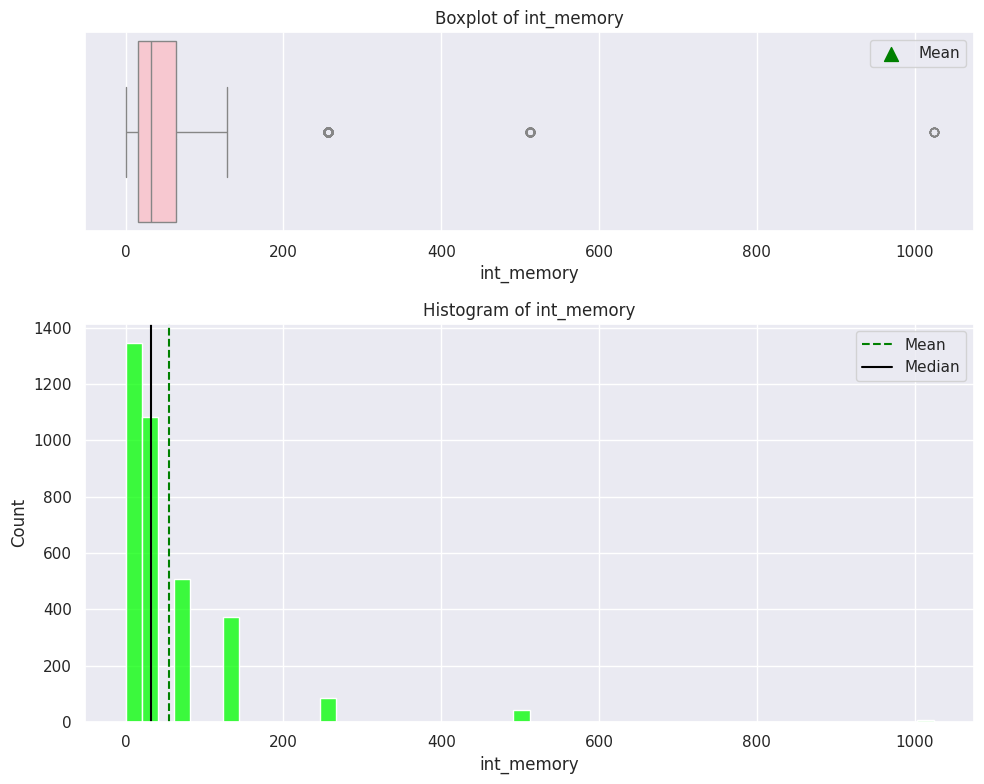

In [ ]:
# Distribution of int memory
eda_combined_plot(data, 'int_memory')




Observations/Insights:

Box Plot:
* The majority of devices have internal memory concentrated within a specific range.
* Several outliers exist with very high internal memory values, which may represent flagship or high-storage devices.

Histogram:
* The majority of devices have internal memory clustered at the lower end (<100 GB).
* There are very few devices with extremely high internal memory (>500 GB), appearing as rare outliers.

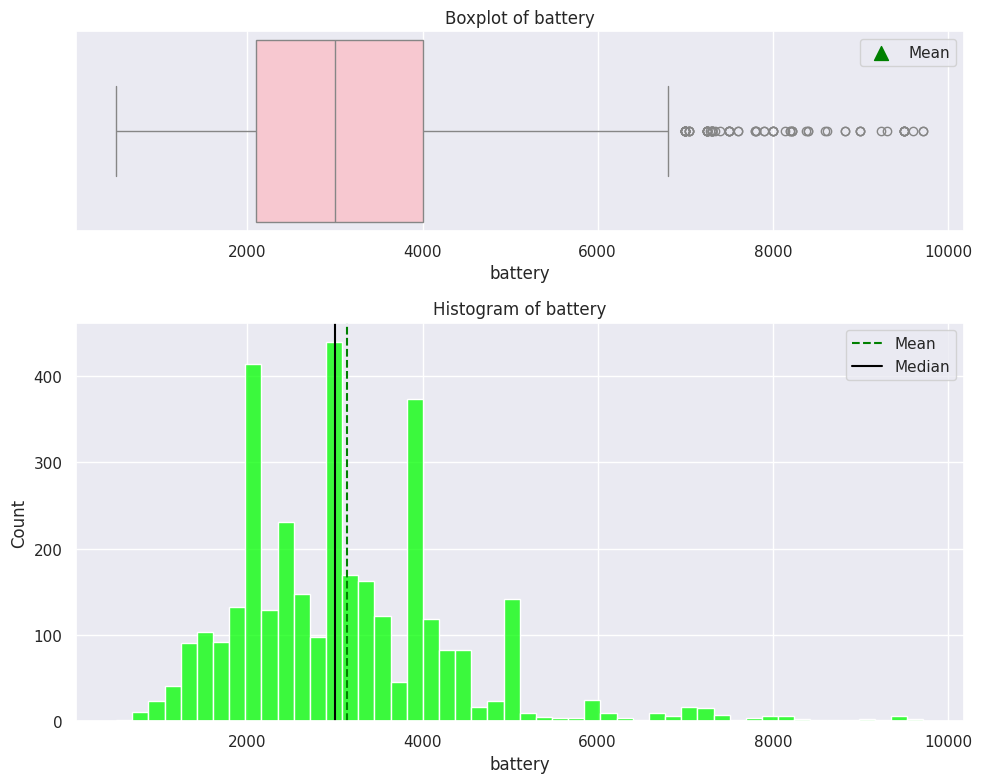

In [ ]:
# Distribution of battery
eda_combined_plot(data, 'battery')

Observations/Insights:

Box Plot:


* The majority of devices aim for 4000 mAh capacity, balancing performance and weight.

* Higher battery capacities (6000 mAh+) are likely in niche devices, such as gaming phones or tablets.

* Extremely high capacities (e.g., above 8000 mAh) are outliers and may represent specialized devices.

* Lower capacities (<2000 mAh) are uncommon, likely representing older or compact models.

Histogram:
* Around 2000-3000 mAh, likely representing older or budget devices.
* Around 4000 mAh, which is common in modern smartphones.
* Very high battery capacities (e.g., >6000 mAh) are rare and represent a small number of devices.

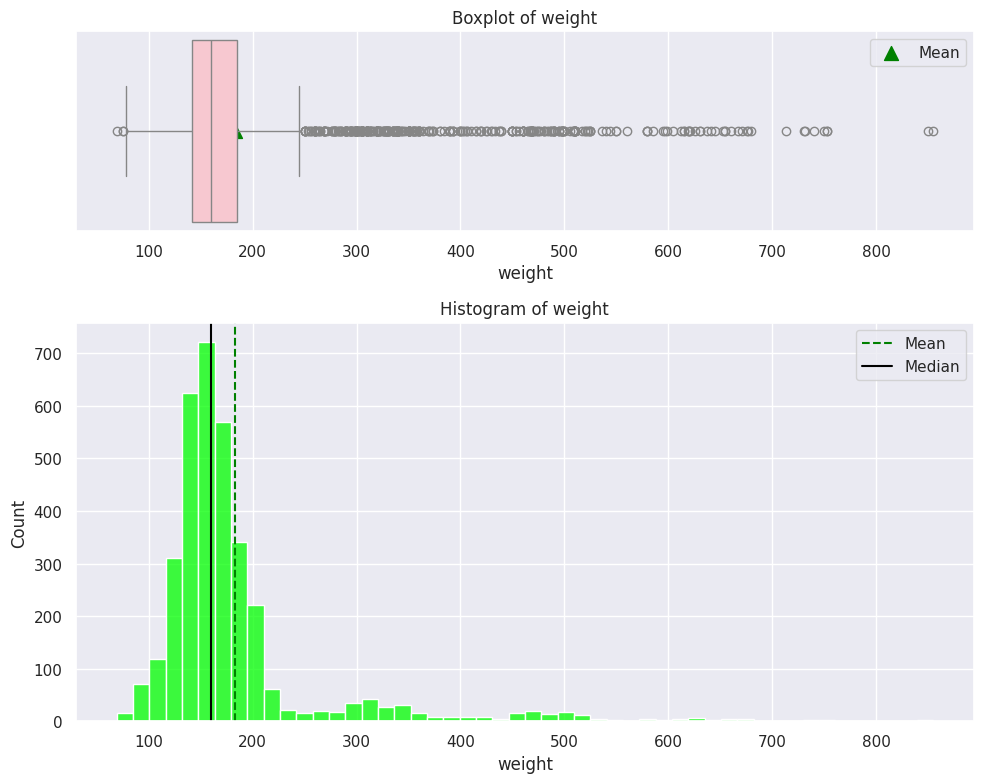

In [ ]:
# Distribution of weight
eda_combined_plot(data, 'weight')

Observations/Insights:

Box Plot:
* Most devices have weights concentrated within the IQR.
* There are numerous outliers with high weights, possibly representing larger or specialized devices.

Histogram:
* The majority of devices weigh between 100 and 250 grams, which is typical for modern smartphones.
* A small number of devices weigh over 400 grams, representing heavier or less common models.
* The distribution shows a long tail to the right, indicating a few exceptionally heavy devices.

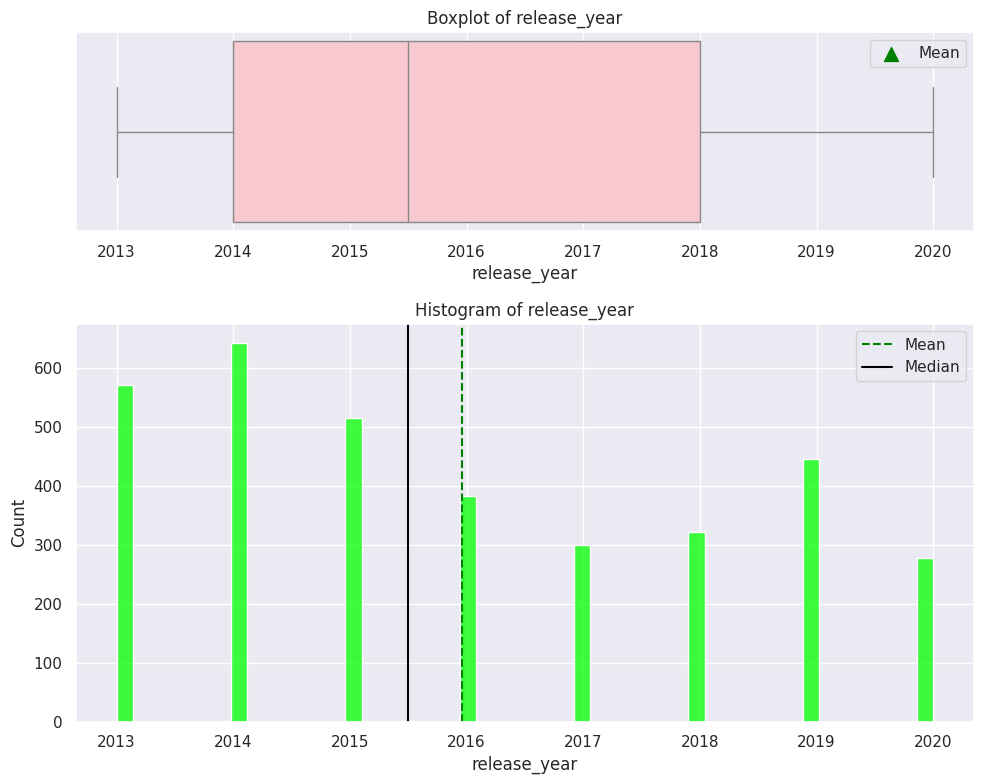

In [ ]:
# Distribution of release year
eda_combined_plot(data, 'release_year')

Observations/Insights:

Box Plot:
* The interquartile range (IQR) spans from approximately 2014 to 2018, indicating that most devices in the dataset were released during this period.
* The median is around 2016, indicating that half of the devices were released on or before this year.
* The mean is marked by a green triangle, which appears slightly later than the median, suggesting a slight right skew.

Histogram:
* Peaks in the number of devices occur in 2014 and 2015, suggesting these were high-production years.
* A noticeable drop in devices released after 2018, which might indicate that the dataset includes fewer newer devices or that production rates declined.
* Both mean (green dashed line) and median (black solid line) are close to 2016, reinforcing the central tendency observed in the boxplot.

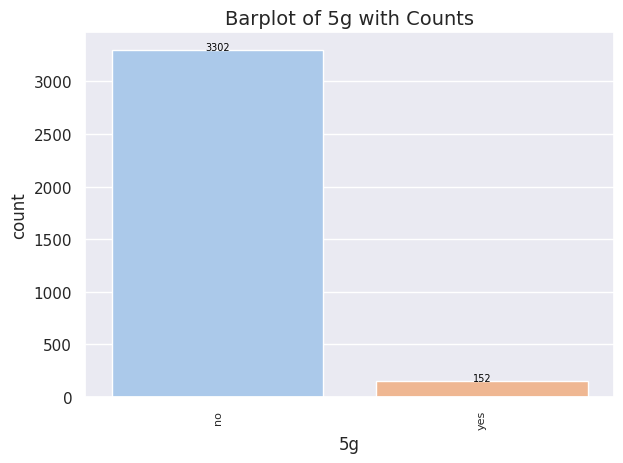

In [ ]:
# Distribution of 5G
labeled_barplot(data, '5g')

Observations/Insights:

Bar Chart:
* * Observed bar chart indicates that the majority of devices do not support 5G (values clustered around 0), with only a small fraction of devices supporting 5G (value = 1).

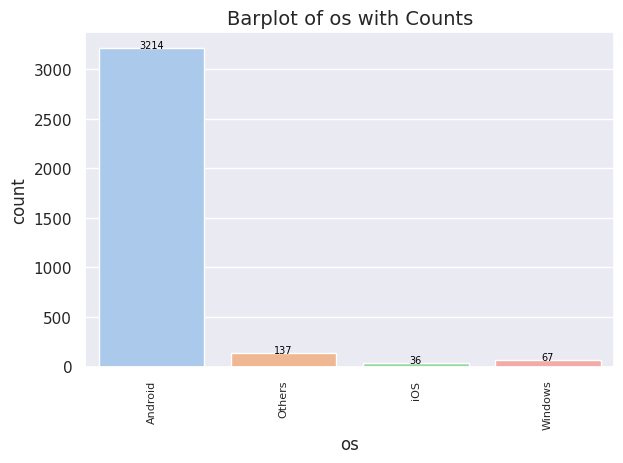

In [ ]:
# Distribution of oeprating system (os)
labeled_barplot(data, 'os')

Observations/Insights:

Bar Chart:
* Android dominates the dataset with the highest count (more than 3000 devices).
* A small number of devices fall under the "Others" category.
* iOS and Windows have very small counts compared to Android, indicating they are much less common in this dataset.

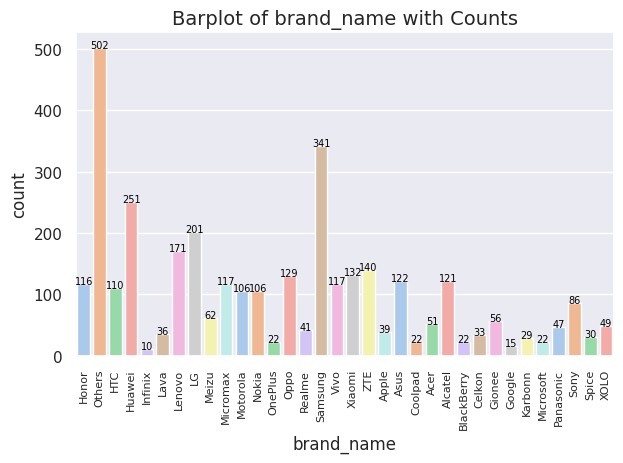

In [ ]:
# Distribution of Brand Name
labeled_barplot(data, 'brand_name')

Observations/Insights:

Box Plot:
* A fairly even distribution of devices across multiple brands, with some brands being significantly more popular than others.

* Green triangle (mean) lies near the middle of the interquartile range, indicating that the distribution is not heavily skewed.

* Boxplot indicates no significant outliers, suggesting that the dataset's brand variable is well-represented without extreme values.

Bar Chart:
* Samsung has the highest number of devices, exceeding 500, indicating its market leadership in this dataset.
* Huawei and Others follow, but with fewer devices, while brands, such as Infinix, XOLO, and Spice, have significantly fewer devices in the dataset.
* Brand name could be an important categorical feature for predicting resale value, especially if specific brands are associated with higher perceived quality or durability.

###Bivariate Analysis:

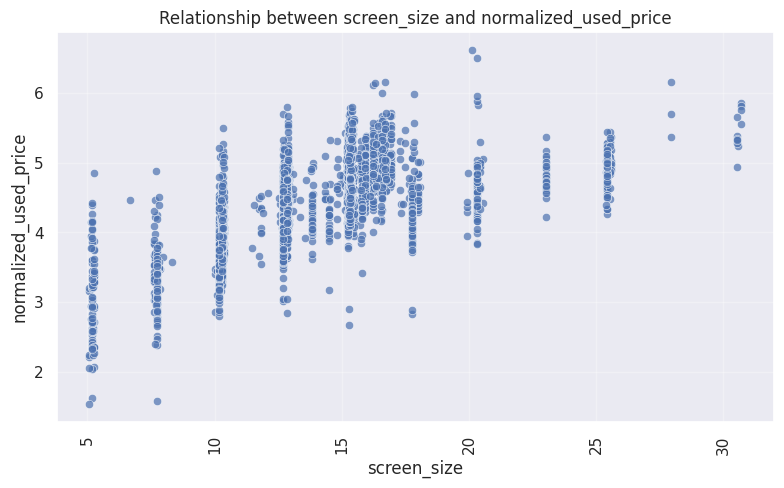

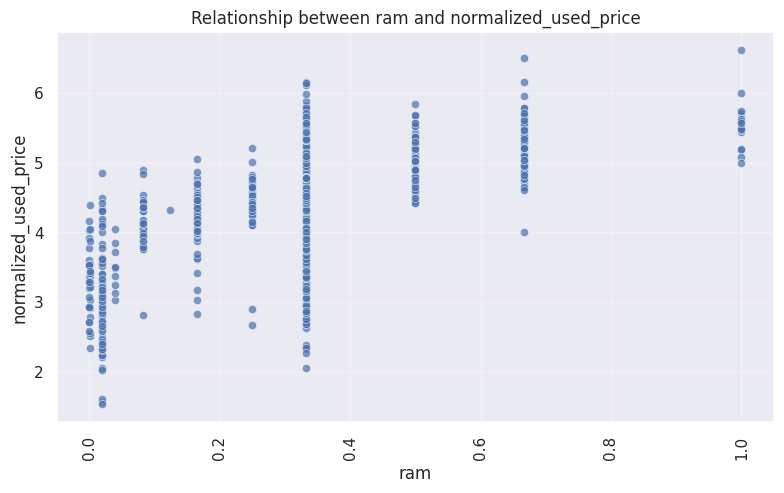

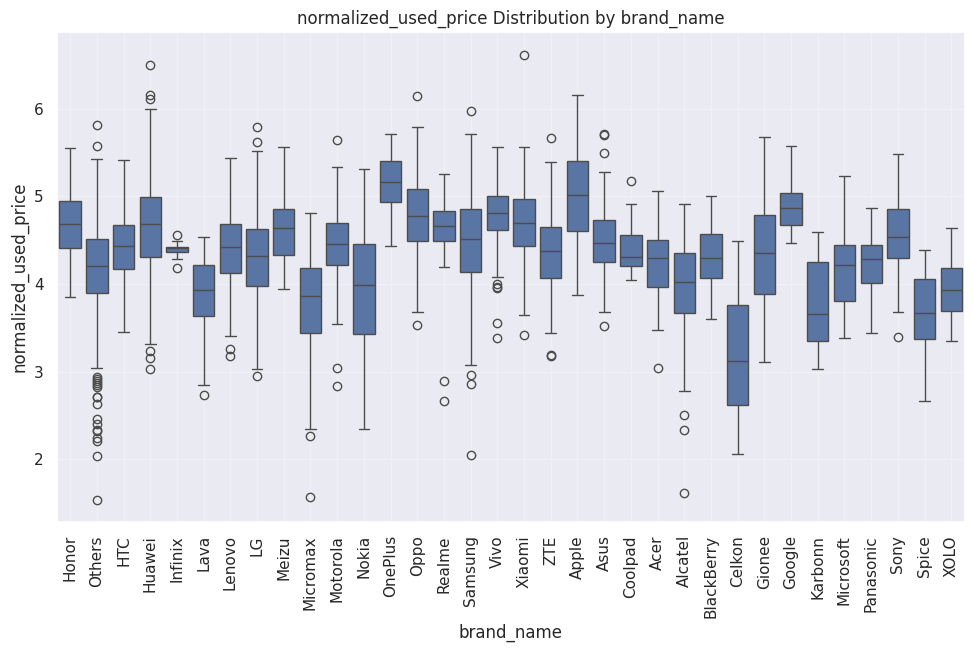

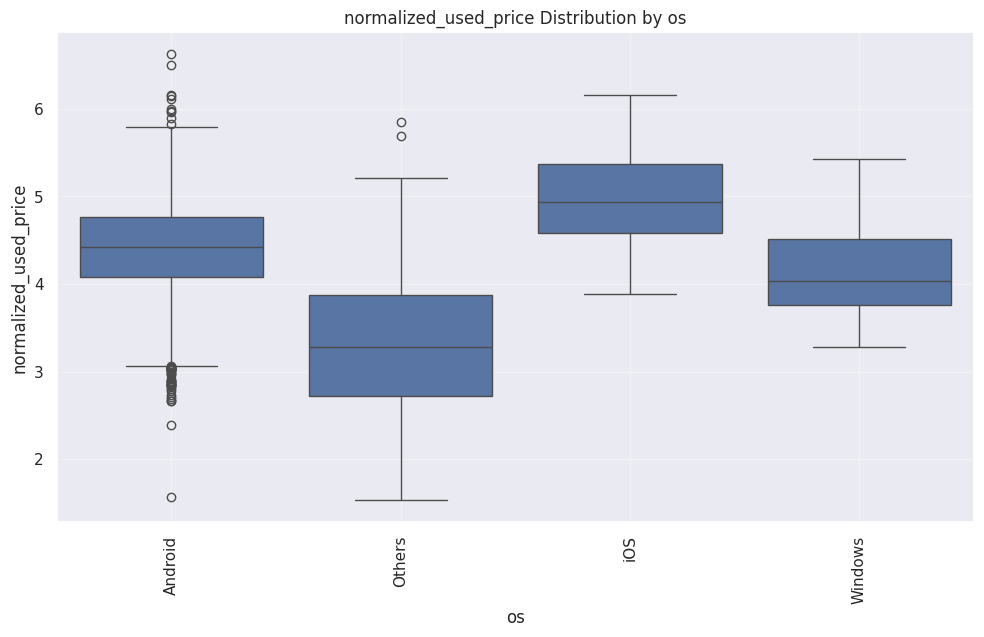

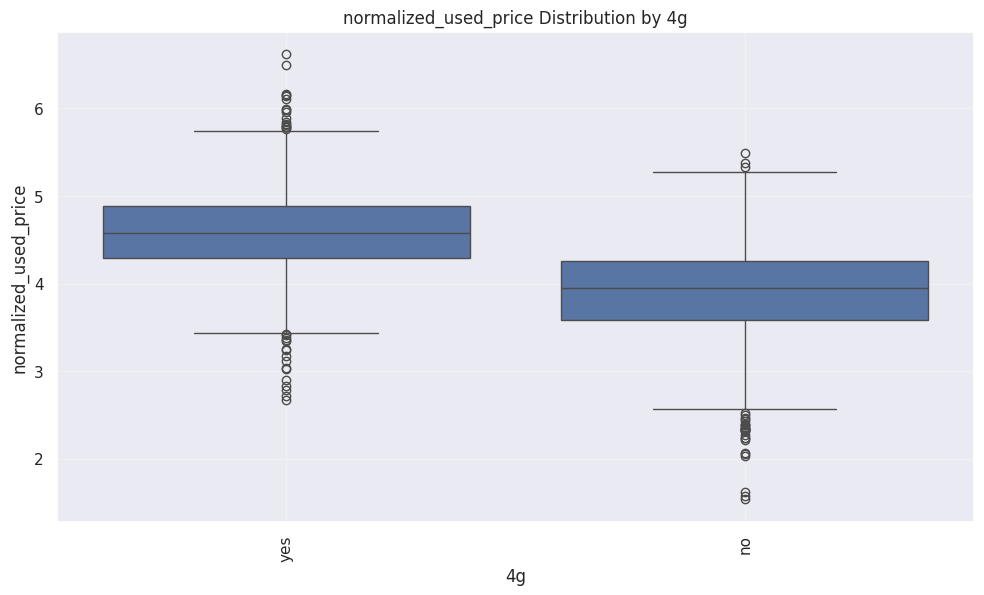

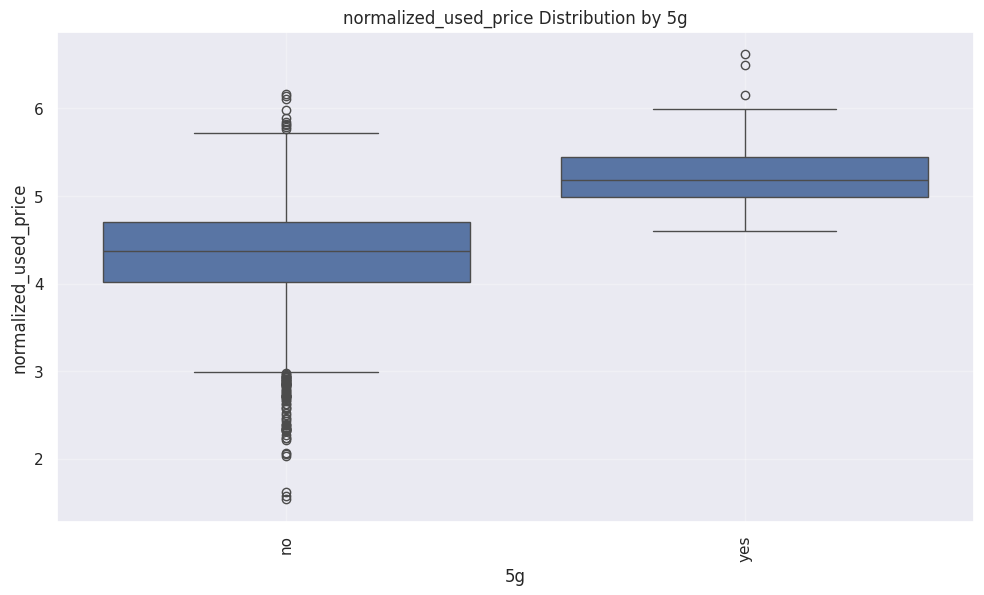

In [ ]:
# Bivariate analysis: Scatterplots relationships between specified numerical variables
pairings = [
    ('screen_size', 'normalized_used_price'),
    ('ram', 'normalized_used_price')
]

for x, y in pairings:
    plt.figure(figsize=(8, 5));
    sns.scatterplot(data=df, x=x, y=y, alpha=0.7)
    plt.title(f'Relationship between {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(alpha=0.3)
     # Adjust the layout
    plt.tight_layout()
    # Prevent label overlap
    plt.xticks(rotation=90)
    plt.show()

# Bivariate analysis: Boxplots categorical vs numerical relationships
categorical_pairings = [
    ('brand_name', 'normalized_used_price'),
    ('os', 'normalized_used_price'),
    ('4g', 'normalized_used_price'),
    ('5g', 'normalized_used_price')
]

for x, y in categorical_pairings:
    plt.figure(figsize=(10, 6));
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f'{y} Distribution by {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    # Adjust the layout
    plt.tight_layout()
    # Prevent label overlap
    plt.xticks(rotation=90)
    plt.grid(alpha=0.3)
    plt.show()


Observations & Insights:

*SCATTER PLOTS:*


Days Used vs. Normalized Used Price:
* Devices lose value as usage duration increases thus a clear negative correlation.
* Larger screen sizes may retain slightly higher value therfore sight positive trend.
* Battery Capacity vs. Normalized Used Price: Battery capacity does not strongly influence price.
* RAM vs. Normalized Used Price:
There is a positive correlation, Higher RAM generally leads to higher resale value.

Screen size vs. Normalized Used Price:
* There appears to be a weak positive correlation between screen size and resale price, as larger screen sizes generally align with higher normalized resale prices.
* Popular screen sizes (10, 15, and 20 inches) dominate the market, reflecting common device categories like tablets, laptops, or monitors.
* Small screen sizes with low prices are likely older smartphones or budget devices.
* Larger screen sizes with high prices might represent premium laptops, monitors, or tablets.

Battery vs. Normalized Used Price:
* A positive correlation is visible: as the battery value increases, the normalized_used_price tends to increase.
* The positive correlation suggests that larger battery capacities add value to a device, likely due to longer battery life being a desirable feature.
* Devices with higher battery capacity are generally associated with higher resale prices.
* Some devices with small battery sizes maintain higher resale prices, indicating that other factors (brand, performance) may compensate for battery size

Ram vs. Normalized Used Price:
* Observed distinct vertical clusters at specific RAM values, suggesting standardized configurations (normalized RAM values of ~0.2, ~0.4, ~0.6, and ~1.0 correspond to common RAM capacities like 2GB, 4GB).
* Devices with higher RAM values generally exhibit higher normalized resale prices.
* Observed positive correlation as RAM increases, the resale price tends to increase.
* Significant number of devices with low RAM (~0.2) have resale prices clustered around 4-5.



*BOX PLOTS:*

Brand name vs. Normalized Used Price:
* Certain brands command higher resale prices, likely due to reputation or demand.

OS vs. Normalized Used Price:
* iOS devices somertimes have higher resale prices than Android devices.

4G vs. Normalized Used Price:
* Devices supporting 4G have slightly higher resale values than those without.

5G vs. Normalized Used Price:
* Significant increase in resale price for 5G-enabled devices compared to non-5G ones.


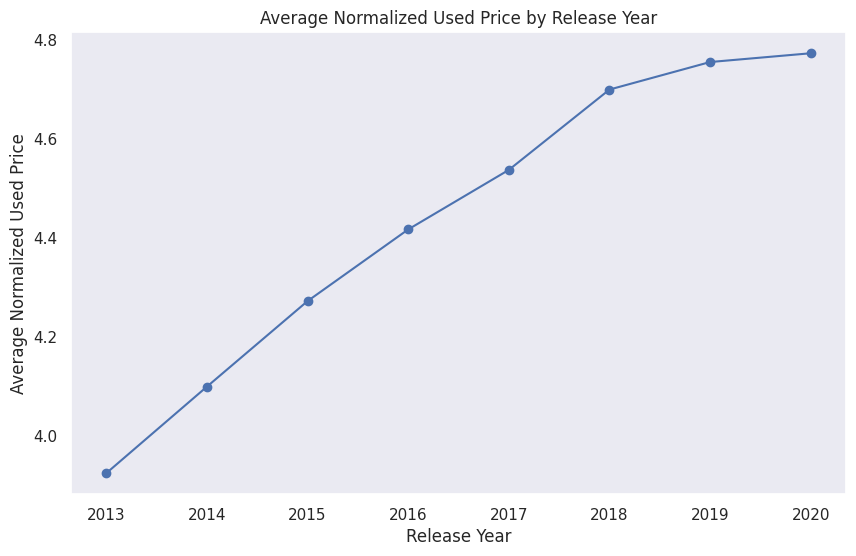

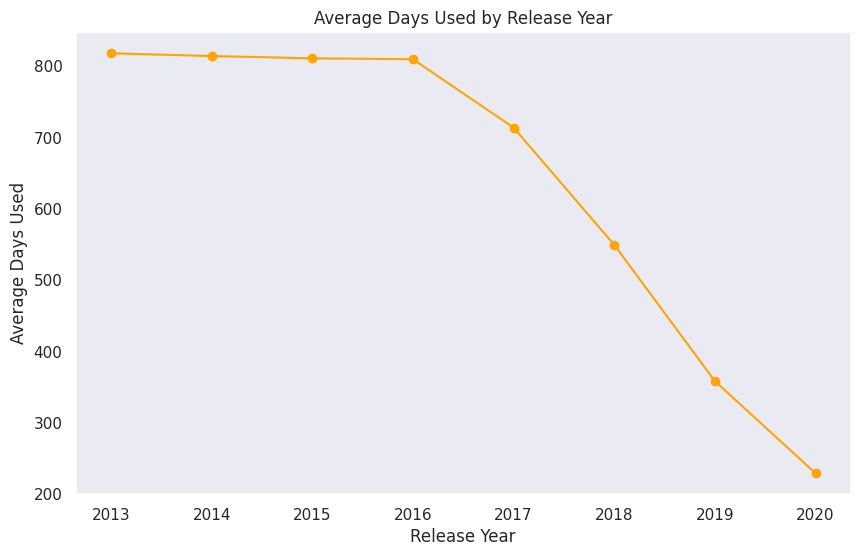

In [ ]:
# Analyze the impact of release year on normalized used price and average days used

# Aggregate data by release year
release_year_analysis = df.groupby('release_year').mean()

# Plot Average normalized used price by release year
plt.figure(figsize=(10, 6))
plt.plot(release_year_analysis.index, release_year_analysis['normalized_used_price'], marker='o')
plt.title('Average Normalized Used Price by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Normalized Used Price')
plt.grid()
plt.show()

# Plot Average days used by release year
plt.figure(figsize=(10, 6))
plt.plot(release_year_analysis.index, release_year_analysis['days_used'], marker='o', color='orange')
plt.title('Average Days Used by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Days Used')
plt.grid()
plt.show()

Observations & Insights:

Average Normalized Used Price by Release Year:
* Devices released in recent years generally have higher normalized used prices.
Aligning with expectations, as newer devices retain more value due to better features and less wear.

Average Days Used by Release Year:

* Older devices (released earlier) show significantly higher average usage days.
Highlighting that older devices have likely depreciated more due to extended usage.

###Multivariate Analysis:


In [ ]:
# Calculate Performance Score and create a new column in the dataset
df['performance_score'] = df['ram'] * df['int_memory']

# Confirm the new column by displaying the first few rows
df.head()


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,performance_score
0,Honor,Android,14.50,yes,no,0.269616,0.15625,0.062491,0.248748,0.273319,0.097964,2020,127,4.307572,4.715100,0.015544
1,Honor,Android,17.30,yes,yes,0.269616,0.50000,0.124991,0.666110,0.412148,0.183206,2020,325,5.162097,5.519018,0.083258
2,Honor,Android,16.69,yes,yes,0.269616,0.25000,0.124991,0.666110,0.401302,0.183206,2020,162,5.111084,5.884631,0.083258
3,Honor,Android,25.50,yes,yes,0.269616,0.25000,0.062491,0.499165,0.732104,0.522901,2020,345,5.135387,5.630961,0.031193
4,Honor,Android,15.32,yes,no,0.269616,0.25000,0.062491,0.248748,0.488069,0.147583,2020,293,4.389995,4.947837,0.015544


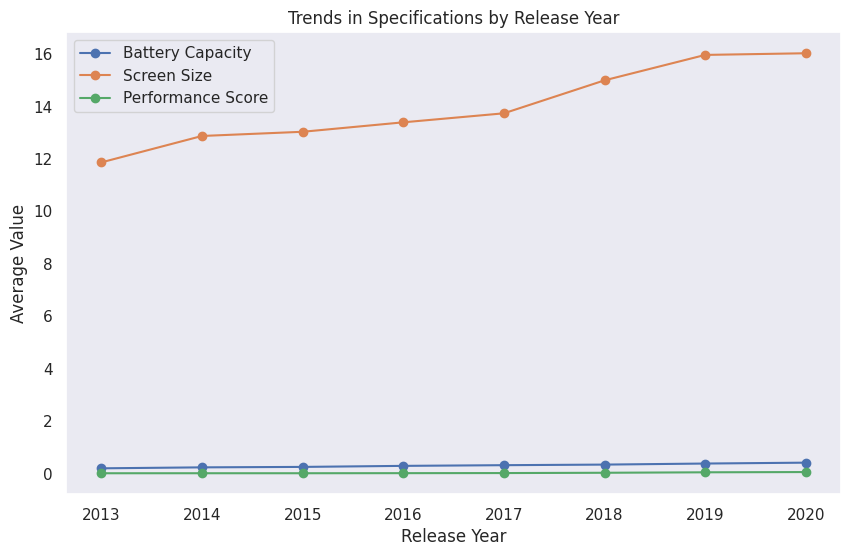

In [ ]:
# Calculate average specifications by release year
release_year_analysis = df.groupby('release_year')[['battery', 'screen_size', 'performance_score']].mean()

# Plot trends in key specifications (battery, screen size, and performance score) by release year
plt.figure(figsize=(10, 6));
plt.plot(release_year_analysis.index, release_year_analysis['battery'], marker='o', label='Battery Capacity')
plt.plot(release_year_analysis.index, release_year_analysis['screen_size'], marker='o', label='Screen Size')
plt.plot(release_year_analysis.index, release_year_analysis['performance_score'], marker='o', label='Performance Score')
plt.title('Trends in Specifications by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid()
plt.show()

Observations & Insights:

* Battery capacity shows a consistent increase over the years, reflecting advancements in battery technology.

* Screen size has gradual growth over the years, indicating a trend toward larger displays.

* Performance score has significant improvement over time, reflecting advancements in hardware specifications (RAM and internal memory).

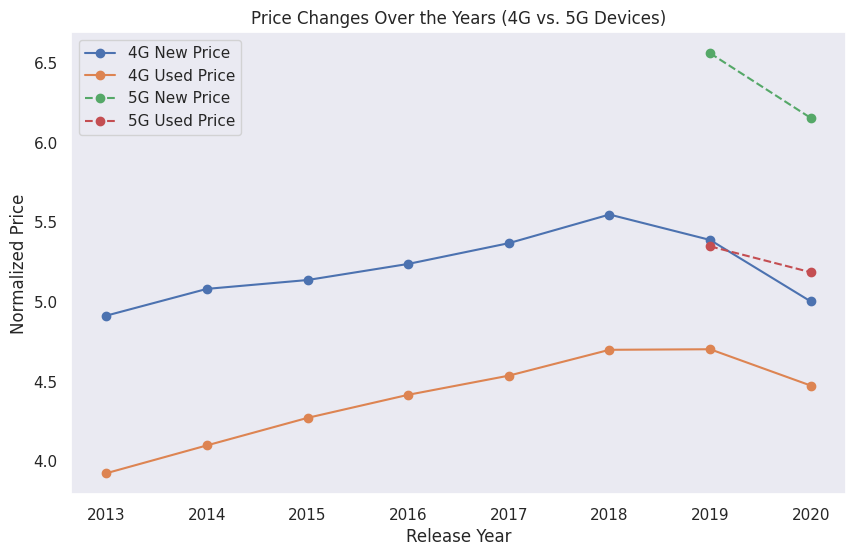

In [ ]:
# Visualize price changes over the years and compare 4G vs. 5G devices
# Investigate network generation (4G/5G) influence by encoding '4g' and '5g' into binary values
df['4g_encoded'] = df['4g'].apply(lambda x: 1 if x == 'yes' else 0)
df['5g_encoded'] = df['5g'].apply(lambda x: 1 if x == 'yes' else 0)

# Group data by release year and network generation for visualization
price_trends = df.groupby(['release_year', '5g_encoded'])[['normalized_new_price', 'normalized_used_price']].mean().reset_index()

# Separate data for 4G and 5G devices
price_4g = price_trends[price_trends['5g_encoded'] == 0]
price_5g = price_trends[price_trends['5g_encoded'] == 1]

# Plot price trends over the years for 4G and 5G devices with proper year labels
plt.figure(figsize=(10, 6))
plt.plot(price_4g['release_year'], price_4g['normalized_new_price'], marker='o', label='4G New Price')
plt.plot(price_4g['release_year'], price_4g['normalized_used_price'], marker='o', label='4G Used Price')
plt.plot(price_5g['release_year'], price_5g['normalized_new_price'], marker='o', label='5G New Price', linestyle='--')
plt.plot(price_5g['release_year'], price_5g['normalized_used_price'], marker='o', label='5G Used Price', linestyle='--')

# Update x-axis to display proper release years
plt.xticks(price_trends['release_year'].unique())

# Add chart details
plt.title('Price Changes Over the Years (4G vs. 5G Devices)')
plt.xlabel('Release Year')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid()
plt.show()


Observations & Insights:

* Decline in 4G prices after 2019 suggests the market is transitioning away from older technology as 5G adoption increases.

* 5G devices command a higher resale value, emphasizing their importance for predicting future market trends.

####Box Plot distribution analysis Normalized used price vs. Int memory

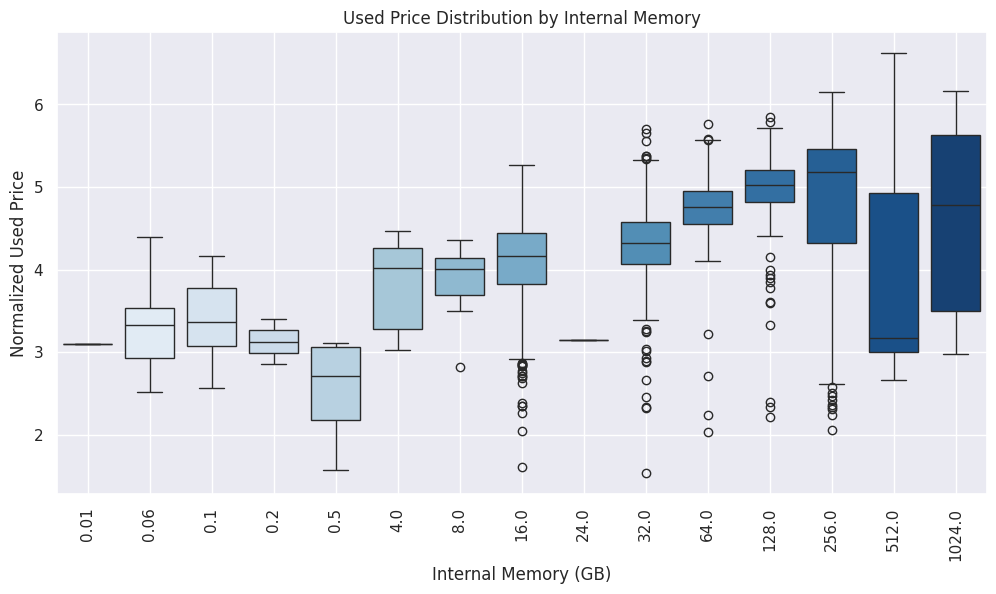

In [ ]:
# Boxplot: Distribution of "normalized_used_price" by "int_memory"
plt.figure(figsize=(12, 6));
sns.boxplot(x=data["int_memory"], y=data["normalized_used_price"], palette="Blues")
plt.title("Used Price Distribution by Internal Memory")
plt.xlabel("Internal Memory (GB)")
plt.ylabel("Normalized Used Price")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Observations/Insights:

Boxplot: Used Price Distribution by Internal Memory:
* Devices with higher internal memory (e.g., 256 GB and above) tend to have higher normalized used prices.

* Variability in resale prices increases with memory size, indicating that other factors (e.g., brand, features) play a role in determining price.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.

## <a name='link1'>Project Conclusion:</a>

In [ ]:
# Recheck original dataframe for its intergrity (data)
data.shape, data.columns

((3454, 15),
 Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
        'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
        'release_year', 'days_used', 'normalized_used_price',
        'normalized_new_price'],
       dtype='object'))

In [ ]:
# Check df (original dataframe copy)
df.shape, df.columns

((3454, 18),
 Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
        'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
        'release_year', 'days_used', 'normalized_used_price',
        'normalized_new_price', 'performance_score', '4g_encoded',
        '5g_encoded'],
       dtype='object'))

<p align="center"><b>** ReCell Project analysis completed.**</b></p>
